# Mensuales

In [ ]:
mensual

passenger_count  trip_distance  total_amount      duration  \
pickup_datetime                                                               
2023-09-30               2732993     3840800.70   45795129.41  2.875794e+07   
2023-10-31               3898868     5472308.86   63778214.48  3.970597e+07   
2023-11-30               3726416     5136505.72   60388236.66  3.754072e+07   
2023-12-31               3890520     5266948.52   61323166.56  3.819132e+07   
2024-01-31               3310266     4670785.61   51801929.35  3.013794e+07   
2024-02-29               3341622     4790656.33   53447385.19  3.177544e+07   
2024-03-31               3916080     5804068.48   63395507.19  3.847457e+07   
2024-04-30               3809875     5778995.02   62516945.41  3.832527e+07   
2024-05-31               3988977     5993937.36   66836199.45  4.142039e+07   
2024-06-30               3824396     5747387.16   63029101.43  3.854885e+07   
2024-07-31               3331196     4900952.14   53354121.69  3.222836e+07   
2024-08-31               3211380     4705139.52   51094326.06  3.070792e+07   

                   n_trips  fecha_numeros  
pickup_datetime                            
2023-09-30       2403633.0         738793  
2023-10-31       2978961.0         738824  
2023-11-30       2841540.0         738854  
2023-12-31       2936035.0         738885  
2024-01-31       2567477.0         738916  
2024-02-29       2618823.0         738945  
2024-03-31       3086307.0         738976  
2024-04-30       3012148.0         739006  
2024-05-31       3177197.5         739037  
2024-06-30       3007364.0         739067  
2024-07-31       2633294.0         739098  
2024-08-31       2483542.0         739129

In [ ]:
mensual_p = mensual['n_trips']

In [ ]:
mensual_p

pickup_datetime
2023-09-30    2403633.0
2023-10-31    2978961.0
2023-11-30    2841540.0
2023-12-31    2936035.0
2024-01-31    2567477.0
2024-02-29    2618823.0
2024-03-31    3086307.0
2024-04-30    3012148.0
2024-05-31    3177197.5
2024-06-30    3007364.0
2024-07-31    2633294.0
2024-08-31    2483542.0
Name: n_trips, dtype: float64

In [ ]:
mensual_p = mensual_p.reset_index()

In [ ]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

ds          y
0  2023-09-30  2403633.0
1  2023-10-31  2978961.0
2  2023-11-30  2841540.0
3  2023-12-31  2936035.0
4  2024-01-31  2567477.0
5  2024-02-29  2618823.0
6  2024-03-31  3086307.0
7  2024-04-30  3012148.0
8  2024-05-31  3177197.5
9  2024-06-30  3007364.0
10 2024-07-31  2633294.0
11 2024-08-31  2483542.0

## Modelo 1

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, weekly_seasonality=True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/19ih5oqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/h0zwuq2p.json
07:50:46 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=62258', 'data', 'file=/tmp/tmp3k5_54x0/19ih5oqy.json', 'init=/tmp/tmp3k5_54x0/h0zwuq2p.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelijvoujic/prophet_model-20241113075046_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=62258', 'data', 'file=/tmp/tmp3k5_54x0/19ih5oqy.json', 'init=/tmp/tmp3k5_54x0/h0zwuq2p.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelijvoujic/prophet_model-20241113075046_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

07:50:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=62258', 'data', 'file=/tmp/tmp3k5_54x0/19ih5oqy.json', 'init=/tmp/tmp3k5_54x0/h0zwuq2p.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelijvoujic/prophet_model-20241113075046_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modelijvoujic/prophet_model-20241113075046_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modelijvoujic/prophet_model-20241113075046_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2023-09-30  5.611050e+06  6.681668e+05  3.830067e+06  3.161110e+06   
1  2023-10-31  5.440292e+06  1.367330e+06  3.752042e+06  3.436284e+06   
2  2023-11-30  5.272563e+06  1.175737e+06  4.255393e+06  3.126921e+06   
3  2023-12-31  5.101934e+06  1.307598e+06  3.776904e+06  3.030982e+06   
4  2024-01-31  4.931211e+06  1.090193e+06  3.245222e+06  2.918485e+06   
5  2024-02-29  4.769442e+06  1.606783e+06  4.279430e+06  2.503310e+06   
6  2024-03-31  4.593916e+06  1.597698e+06  4.521606e+06  2.764541e+06   
7  2024-04-30  4.425200e+06  1.625313e+06  3.798123e+06  3.579122e+06   
8  2024-05-31  4.251120e+06  2.828200e+06  4.505814e+06  3.390003e+06   
9  2024-06-30  4.083560e+06 -8.717737e+04  3.083839e+06  2.845375e+06   
10 2024-07-31  3.910414e+06  1.906361e+06  4.302384e+06  2.493109e+06   
11 2024-08-31  3.737268e+06  1.652904e+06  4.187389e+06  2.140843e+06   
12 2024-09-30  3.569707e+06 -7.098267e+06  3.985657e+07  1.813922e+06   
13 2024-10-31  3.396561e+06 -1.615578e+06  3.928367e+07  1.361354e+06   
14 2024-11-30  3.229000e+06  9.669611e+06  3.770875e+07  9.265188e+05   
15 2024-12-31  3.055854e+06 -8.201870e+07  8.836021e+06  4.792226e+05   
16 2025-01-31  2.882708e+06 -1.236132e+07  4.051695e+07  2.876801e+04   
17 2025-02-28  2.726318e+06 -3.650923e+06  4.618225e+07 -3.796844e+05   
18 2025-03-31  2.553172e+06 -2.229118e+07  2.713115e+07 -8.178838e+05   
19 2025-04-30  2.385611e+06 -1.364428e+07  7.707631e+07 -1.240702e+06   
20 2025-05-31  2.212465e+06 -2.645774e+07  3.370976e+07 -1.675756e+06   
21 2025-06-30  2.044904e+06 -2.504026e+07  2.224519e+07 -2.083898e+06   
22 2025-07-31  1.871758e+06 -3.798303e+07  1.207831e+07 -2.492595e+06   
23 2025-08-31  1.698612e+06 -3.736709e+07  4.414887e+07 -2.894259e+06   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   8.203198e+06   -3.128116e+06         -6.281803e+06          1.503119e+05   
1   8.185888e+06   -2.499796e+06         -5.280419e+06          1.222952e+06   
2   7.618080e+06   -2.522789e+06         -4.452981e+06         -4.655631e+05   
3   7.484333e+06   -2.147147e+06         -4.491314e+06          1.042055e+05   
4   7.633388e+06   -2.627340e+06         -4.864865e+06         -1.776408e+05   
5   7.641604e+06   -1.917844e+06         -4.816177e+06          9.732294e+05   
6   7.733709e+06   -1.390311e+06         -4.720456e+06          4.147886e+05   
7   7.791537e+06   -1.446257e+06         -4.900986e+06         -5.199687e+05   
8   8.220984e+06   -8.048468e+05         -4.227043e+06          9.143392e+05   
9   8.463884e+06   -1.786996e+06         -5.655936e+06         -2.032287e+04   
10  9.224308e+06   -8.003289e+05         -6.539210e+06          1.067404e+06   
11  9.596262e+06   -1.141000e+06         -7.207301e+06          8.271238e+05   
12  1.030273e+07    5.311180e+06         -1.471085e+07          3.305230e+07   
13  1.101168e+07   -2.479840e+06         -5.354924e+06          2.981023e+07   
14  1.168728e+07    1.983338e+07          2.566819e+06          3.464883e+07   
15  1.215711e+07   -3.386151e+07         -8.711208e+07          7.350967e+06   
16  1.273664e+07    8.627923e+06         -1.168212e+07          2.837483e+07   
17  1.326740e+07    1.774260e+07          1.709599e+06          3.975055e+07   
18  1.382196e+07   -1.363080e+06         -3.351911e+07          1.813650e+07   
19  1.434564e+07    1.160233e+07         -2.627405e+07          6.285962e+07   
20  1.488140e+07   -1.518161e+06         -4.007527e+07          2.729782e+07   
21  1.539255e+07   -3.066701e+06         -3.145120e+07          1.646812e+07   
22  1.592016e+07   -9.479473e+06         -4.086244e+07          1.114905e+07   
23  1.646347e+07    6.528518e+06         -2.414154e+07          3.413689e+07   

          weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0   4.534208e+06 -1.521367e+07  2.810053e+07 -7.662324e+06 -3.372204e+07   
1  -1.764035e+07 -4.901091e+07 -

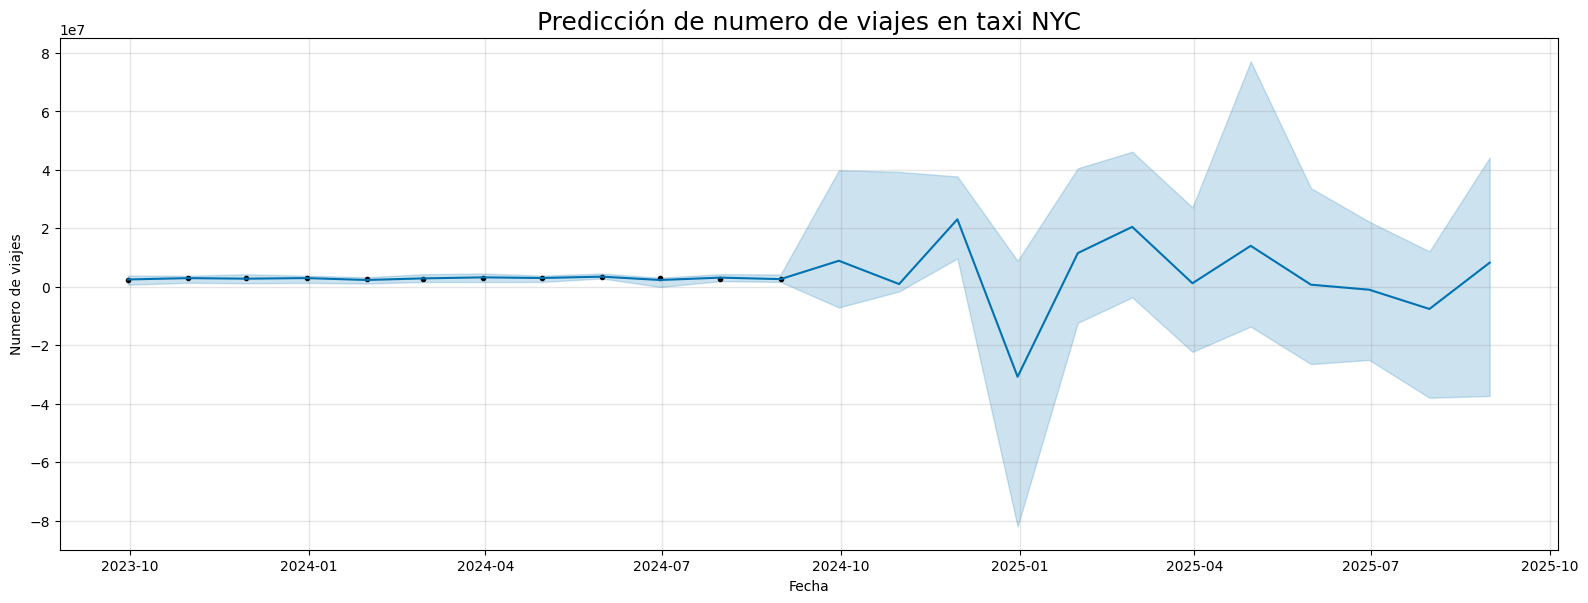

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

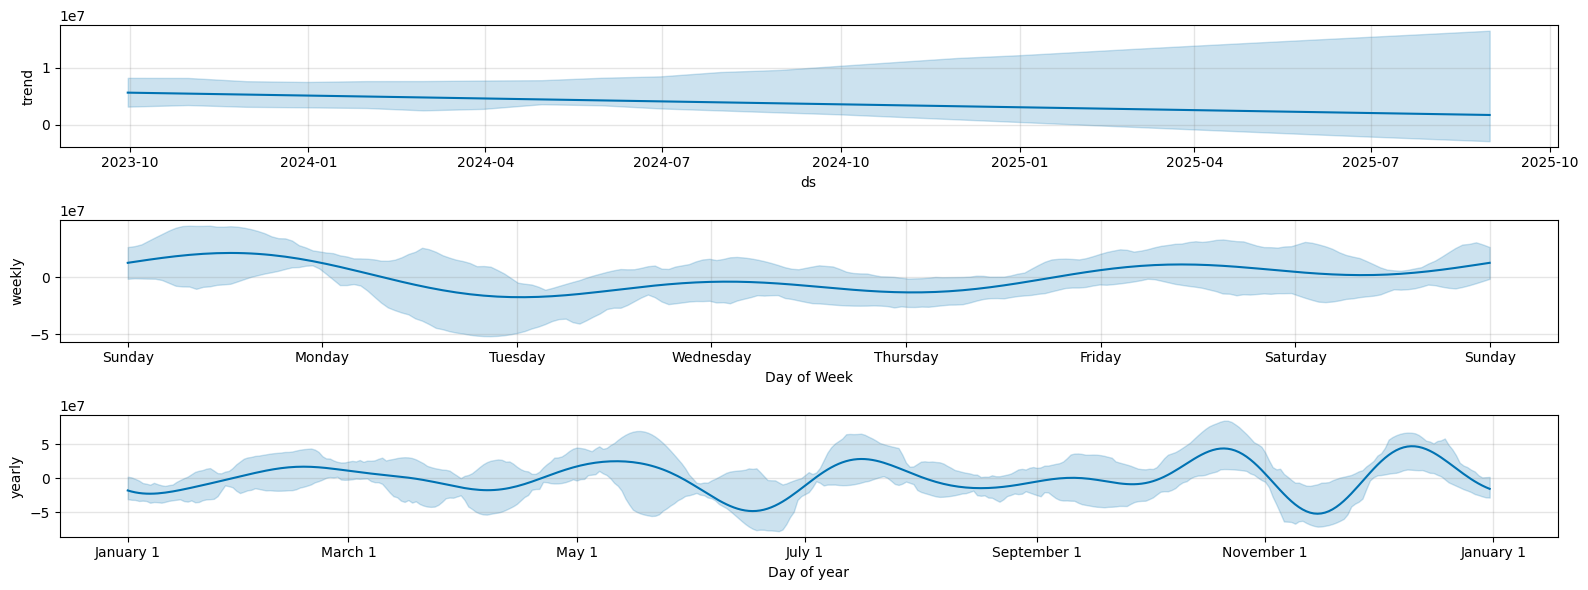

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 2

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, 
                  daily_seasonality=True, 
                  weekly_seasonality=True, 
                  uncertainty_samples = 30, 
                  mcmc_samples=30, 
                  interval_width= 0.5)

# Entrenamos el modelo
prophet.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/oyg7f2bs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/mspumcm8.json
08:08:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=74839', 'data', 'file=/tmp/tmp3k5_54x0/oyg7f2bs.json', 'init=/tmp/tmp3k5_54x0/mspumcm8.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelrlydve_3/prophet_model-20241113080837_1.csv', 'method=sample', 'num_samples=15', 'num_warmup=15', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=74839', 'data', 'file=/tmp/tmp3k5_54x0/oyg7f2bs.json', 'init=/tmp/tmp3k5_54x0/mspumcm8.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelrlydve_3/prophet_model-20241113080837_2.csv', 'method=sample', 'num_samples=15', 'num_warmup=15', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

08:08:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=74839', 'data', 'file=/tmp/tmp3k5_54x0/oyg7f2bs.json', 'init=/tmp/tmp3k5_54x0/mspumcm8.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelrlydve_3/prophet_model-20241113080837_1.csv', 'method=sample', 'num_samples=15', 'num_warmup=15', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modelrlydve_3/prophet_model-20241113080837_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modelrlydve_3/prophet_model-20241113080837_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 15
    num_warmup = 15
    save_warmup = 0 (Default)
    thin = 1 (Default)


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2023-09-30  4.410668e+06  9.666459e+05  3.238926e+06 -3.989829e+06   
1  2023-10-31  4.221271e+06  2.344998e+06  3.956540e+06 -4.366328e+06   
2  2023-11-30  4.038965e+06  2.015106e+06  3.919671e+06 -4.677003e+06   
3  2023-12-31  3.846750e+06  2.568939e+06  4.151820e+06 -4.575238e+06   
4  2024-01-31  3.655382e+06  1.631751e+06  3.618937e+06 -4.479716e+06   
5  2024-02-29  3.476244e+06  1.583124e+06  3.316558e+06 -4.388277e+06   
6  2024-03-31  3.284475e+06  2.068690e+06  3.783791e+06 -4.167118e+06   
7  2024-04-30  3.097317e+06  1.686718e+06  4.227604e+06 -4.162672e+06   
8  2024-05-31  2.908422e+06  2.417160e+06  4.520618e+06 -4.687303e+06   
9  2024-06-30  2.722309e+06  2.159279e+06  4.212158e+06 -5.097858e+06   
10 2024-07-31  2.529992e+06  1.681751e+06  3.362329e+06 -6.961282e+06   
11 2024-08-31  2.337675e+06  1.447301e+06  3.525295e+06 -6.812244e+06   
12 2024-09-30  2.151562e+06 -2.948033e+07  4.717340e+07 -6.308048e+06   
13 2024-10-31  1.959246e+06 -3.762218e+07  4.701177e+07 -6.011628e+06   
14 2024-11-30  1.773133e+06 -3.970939e+07  1.249726e+07 -6.320439e+06   
15 2024-12-31  1.580816e+06 -1.156343e+07  1.533905e+07 -6.792517e+06   
16 2025-01-31  1.388499e+06 -3.044905e+07  1.147259e+07 -7.530505e+06   
17 2025-02-28  1.214794e+06 -2.402844e+07  1.533694e+07 -8.057986e+06   
18 2025-03-31  1.022477e+06 -3.637275e+07  2.946728e+07 -9.235837e+06   
19 2025-04-30  8.363639e+05 -1.087115e+06  3.331207e+07 -1.043146e+07   
20 2025-05-31  6.440471e+05 -5.450970e+07  3.289740e+07 -1.181937e+07   
21 2025-06-30  4.579341e+05 -3.639511e+07  2.998457e+07 -1.314469e+07   
22 2025-07-31  2.656174e+05 -1.676385e+07  1.832743e+07 -1.444373e+07   
23 2025-08-31  7.330063e+04 -1.804034e+07  2.366468e+07 -1.574503e+07   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   1.232770e+07   -2.124277e+06         -9.093265e+06          7.368821e+06   
1   1.231458e+07   -1.146962e+06         -8.967863e+06          8.233916e+06   
2   1.198615e+07   -1.247083e+06         -9.196330e+06          6.365352e+06   
3   1.206958e+07   -7.072246e+05         -9.043351e+06          8.462502e+06   
4   1.101813e+07   -1.128074e+06         -8.418874e+06          7.288981e+06   
5   9.775369e+06   -1.197631e+06         -7.607060e+06          6.500146e+06   
6   8.763007e+06   -2.296770e+05         -6.395977e+06          7.063031e+06   
7   8.013584e+06   -1.944769e+05         -5.434400e+06          6.988030e+06   
8   7.570228e+06    3.165459e+05         -4.941580e+06          8.304923e+06   
9   7.388586e+06    4.228087e+05         -4.685499e+06          8.143679e+06   
10  7.200888e+06    5.852229e+03         -5.138037e+06          9.303293e+06   
11  7.013191e+06   -6.954612e+04         -5.224656e+06          9.027232e+06   
12  6.829349e+06   -4.245340e+06         -4.191797e+07          4.708996e+07   
13  7.027308e+06    5.846138e+06         -2.940825e+07          4.157200e+07   
14  7.157658e+06   -1.681958e+07         -3.227979e+07         -1.539865e+06   
15  7.289808e+06   -3.408037e+05         -1.950283e+07          2.110825e+07   
16  7.421304e+06   -8.050516e+06         -3.264193e+07          1.770778e+07   
17  7.533331e+06   -7.028729e+06         -2.511393e+07          1.875173e+07   
18  7.433630e+06   -9.877211e+06         -3.656805e+07          2.488867e+07   
19  7.962160e+06    1.185212e+07         -5.587980e+06          2.943400e+07   
20  8.556161e+06   -1.071329e+07         -4.249154e+07          2.702674e+07   
21  9.118737e+06   -9.673513e+06         -3.859295e+07          2.135929e+07   
22  9.701060e+06   -8.342083e+05         -1.924810e+07          2.227784e+07   
23  1.029089e+07    5.409127e+06         -1.976543e+07          3.894691e+07   

           daily  ...        weekly  weekly_lower  weekly_upper        yearly  \
0  -2.096583e+06  ... -6.807903e+06 -2.310742e+07  1.075168e+07  6.780208e+06   
1  -2.096583e+06  ... 

In [ ]:
forecast.to_csv('forecast_mensual.csv')

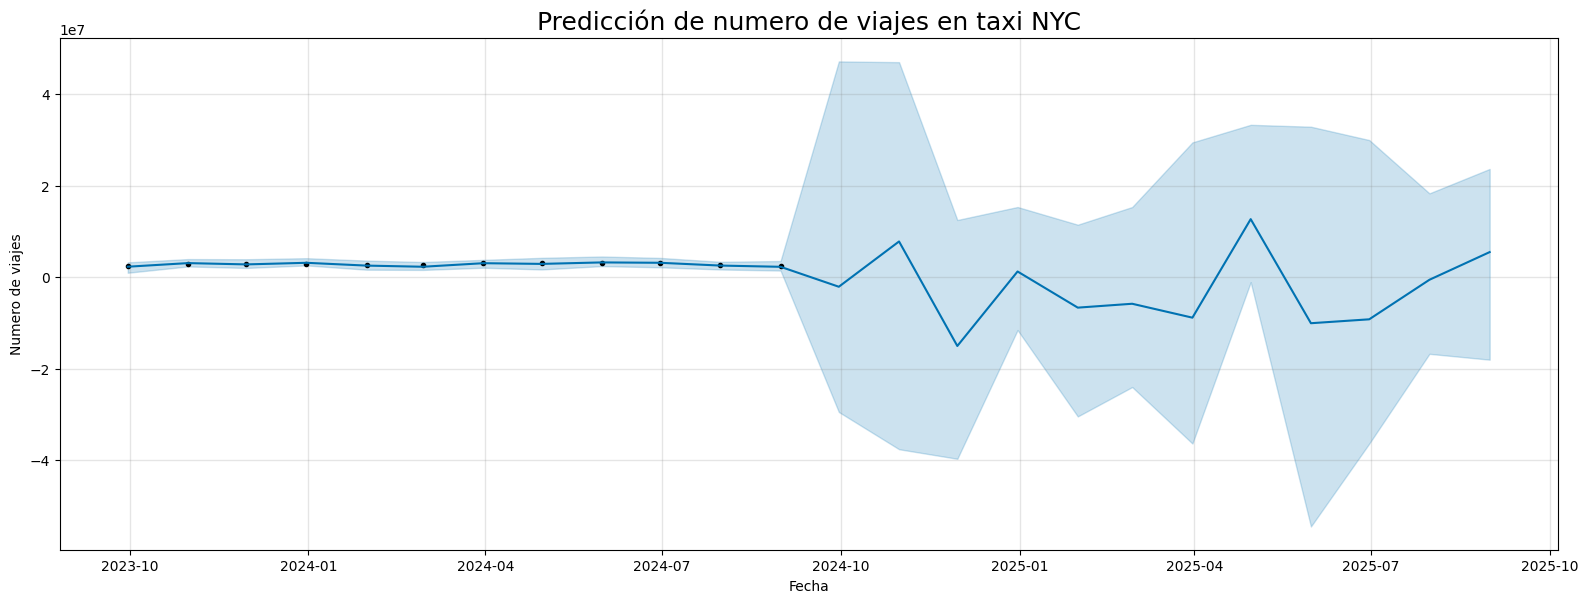

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

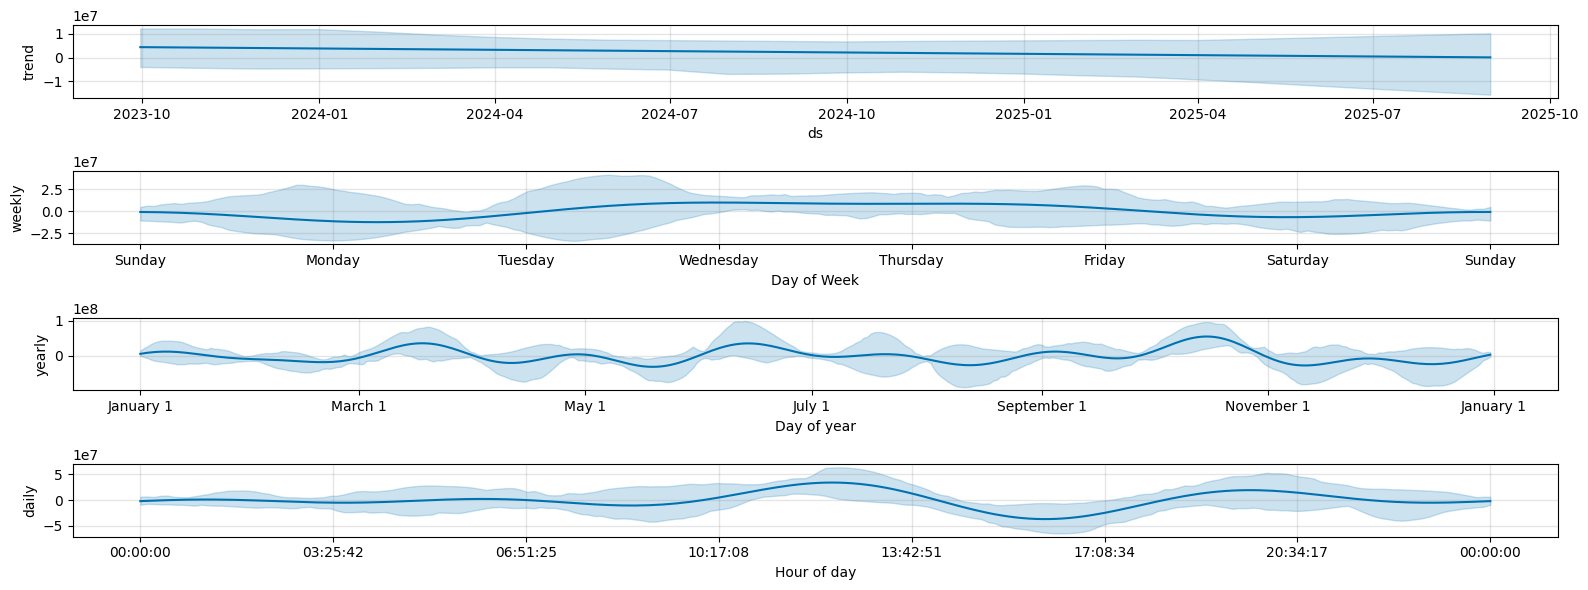

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 3

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, daily_seasonality=True, weekly_seasonality=True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/s283w23j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/jixvk7rt.json
07:38:22 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48157', 'data', 'file=/tmp/tmp3k5_54x0/s283w23j.json', 'init=/tmp/tmp3k5_54x0/jixvk7rt.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelhjr6vrow/prophet_model-20241113073823_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=48157', 'data', 'file=/tmp/tmp3k5_54x0/s283w23j.json', 'init=/tmp/tmp3k5_54x0/jixvk7rt.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelhjr6vrow/prophet_model-20241113073823_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

07:38:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48157', 'data', 'file=/tmp/tmp3k5_54x0/s283w23j.json', 'init=/tmp/tmp3k5_54x0/jixvk7rt.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelhjr6vrow/prophet_model-20241113073823_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modelhjr6vrow/prophet_model-20241113073823_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modelhjr6vrow/prophet_model-20241113073823_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2023-09-30 -1.517186e+06 -3.120301e+05  2.896035e+06 -1.391014e+07   
1  2023-10-31 -1.710209e+06  5.806932e+05  3.822641e+06 -1.495928e+07   
2  2023-11-30 -1.896844e+06  8.649087e+05  4.137272e+06 -1.597012e+07   
3  2023-12-31 -2.089421e+06  1.998668e+06  4.441261e+06 -1.688887e+07   
4  2024-01-31 -2.285536e+06  8.617703e+05  3.650614e+06 -1.805841e+07   
5  2024-02-29 -2.469662e+06  1.027070e+06  4.808076e+06 -1.902311e+07   
6  2024-03-31 -2.662717e+06  1.743835e+06  5.427118e+06 -2.003049e+07   
7  2024-04-30 -2.851345e+06  6.858202e+05  4.517194e+06 -2.098991e+07   
8  2024-05-31 -3.049156e+06  1.525777e+06  4.431914e+06 -2.198925e+07   
9  2024-06-30 -3.241416e+06  1.151518e+06  4.461115e+06 -2.295354e+07   
10 2024-07-31 -3.440086e+06  2.068053e+06  4.327262e+06 -2.394997e+07   
11 2024-08-31 -3.638755e+06  7.232251e+05  3.252255e+06 -2.494640e+07   
12 2024-09-30 -3.831015e+06 -4.245981e+07  1.695562e+06 -2.591069e+07   
13 2024-10-31 -4.029684e+06 -1.339965e+07  4.741638e+07 -2.690757e+07   
14 2024-11-30 -4.221944e+06 -4.228317e+07  2.694405e+07 -2.777428e+07   
15 2024-12-31 -4.420613e+06 -5.303637e+07  2.155803e+06 -2.886957e+07   
16 2025-01-31 -4.619283e+06 -5.638486e+07  8.443543e+06 -2.986192e+07   
17 2025-02-28 -4.798726e+06 -5.167029e+07 -2.168396e+07 -3.075959e+07   
18 2025-03-31 -4.997395e+06 -8.604880e+07 -1.907441e+07 -3.175764e+07   
19 2025-04-30 -5.189655e+06 -1.930432e+07  2.031673e+07 -3.272311e+07   
20 2025-05-31 -5.388324e+06 -1.429421e+07  5.421207e+07 -3.371966e+07   
21 2025-06-30 -5.580584e+06 -8.737535e+07 -1.984994e+07 -3.468312e+07   
22 2025-07-31 -5.779254e+06 -2.166536e+07  4.989393e+07 -3.611289e+07   
23 2025-08-31 -5.977923e+06  1.734366e+07  6.063984e+07 -3.728767e+07   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   5.070489e+06    3.303082e+06         -3.499523e+06          1.509807e+07   
1   6.120231e+06    4.167717e+06         -4.760529e+06          1.906949e+07   
2   8.035200e+06    4.558411e+06         -4.953602e+06          1.902002e+07   
3   1.076841e+07    4.855020e+06         -7.251742e+06          1.913041e+07   
4   1.281339e+07    4.837015e+06         -1.026107e+07          2.223828e+07   
5   1.388910e+07    4.895664e+06         -1.227516e+07          2.078427e+07   
6   1.435667e+07    5.869652e+06         -1.074950e+07          2.139307e+07   
7   1.545569e+07    6.063704e+06         -1.265204e+07          2.281683e+07   
8   1.599907e+07    6.369372e+06         -1.343797e+07          2.285327e+07   
9   1.587572e+07    6.231101e+06         -1.192036e+07          2.322107e+07   
10  1.595036e+07    6.760641e+06         -1.255983e+07          2.715870e+07   
11  1.705602e+07    5.750862e+06         -1.297803e+07          2.768993e+07   
12  1.782663e+07   -1.440513e+07         -2.020069e+07          1.081536e+07   
13  1.721004e+07    1.306136e+07         -1.632640e+07          2.545850e+07   
14  1.718391e+07   -1.272524e+07         -4.710708e+07          1.779852e+07   
15  1.698688e+07   -2.089683e+07         -3.157942e+07         -6.832909e+06   
16  1.670492e+07   -2.020078e+07         -4.773487e+07          3.799171e+06   
17  1.645233e+07   -2.876166e+07         -4.634984e+07         -9.066955e+06   
18  1.621657e+07   -4.584923e+07         -6.337766e+07         -3.029339e+07   
19  1.647269e+07    6.179468e+06         -1.053921e+06          1.772093e+07   
20  1.665245e+07    2.012754e+07         -2.103220e+07          4.968461e+07   
21  1.683664e+07   -4.421080e+07         -6.022162e+07         -2.635447e+07   
22  1.701782e+07    1.643773e+07         -1.794184e+07          5.562778e+07   
23  1.718339e+07    4.172920e+07         -1.856469e+07          9.791386e+07   

           daily  ...        weekly  weekly_lower  weekly_upper        yearly  \
0  -2.862331e+06  ... -6.765628e+06 -2.465348e+07  7.103639e+05  1.293104e+07   
1  -2.862331e+06  ... 

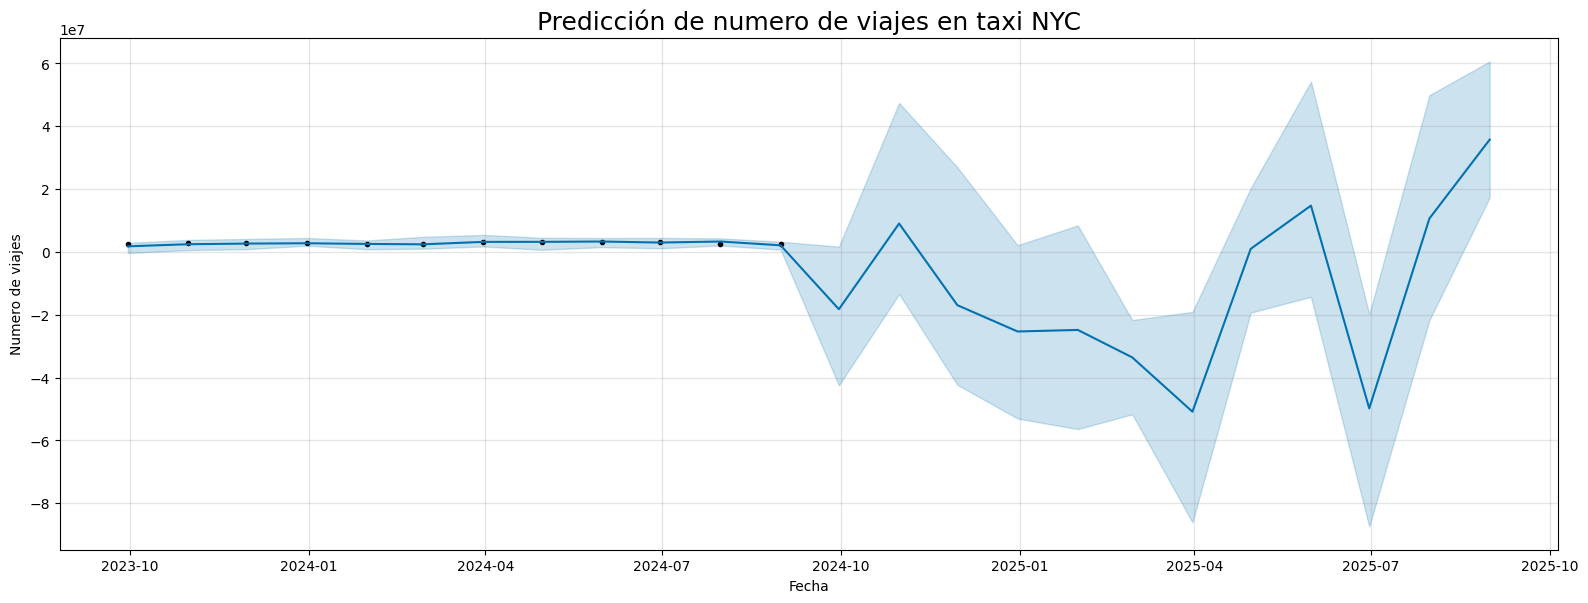

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

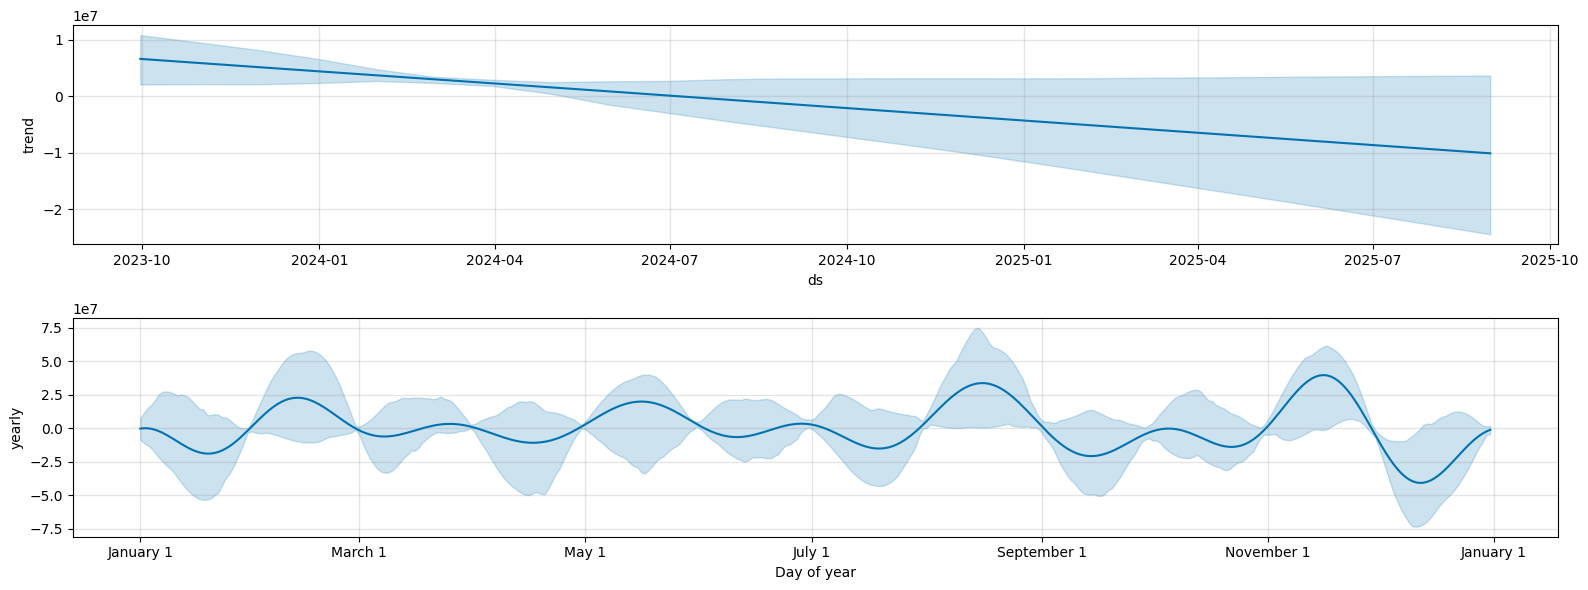

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

# Semanales

In [ ]:
semanal

passenger_count  trip_distance  total_amount      duration  \
pickup_datetime                                                               
2023-09-17                860067     1215057.15   14395656.38  9.061134e+06   
2023-09-24                379317      536201.11    6733854.78  4.294240e+06   
2023-10-01                840174     1177465.37   13800304.01  8.531493e+06   
2023-10-08                871700     1223806.22   14176927.80  8.775225e+06   
2023-10-15                865999     1207735.18   14104448.20  8.814019e+06   
2023-10-22                907592     1277345.21   14942243.25  9.348573e+06   
2023-10-29                918159     1294032.09   15201975.82  9.523136e+06   
2023-11-05                913241     1266912.80   14828373.80  9.198919e+06   
2023-11-12                917584     1287744.16   15064418.04  9.486671e+06   
2023-11-19                913203     1287224.49   15053581.43  9.291660e+06   
2023-11-26                725464      930497.46   10809573.30  6.588956e+06   
2023-12-03                900053     1233132.86   14733186.07  9.278666e+06   
2023-12-10                971199     1347061.17   16009009.38  1.010145e+07   
2023-12-17               1014015     1419112.04   16839854.39  1.057907e+07   
2023-12-24                843518     1113945.59   13032039.14  7.999517e+06   
2023-12-31                638569      824306.71    8947461.68  5.401852e+06   
2024-01-07                697427      974924.04   10305327.02  5.835861e+06   
2024-01-14                760821     1068073.62   11839609.34  6.855599e+06   
2024-01-21                756058     1047170.69   11768413.98  6.829028e+06   
2024-01-28                790263     1133066.89   12734515.07  7.588518e+06   
2024-02-04                781221     1118317.72   12559025.60  7.421882e+06   
2024-02-11                806209     1164318.59   13048463.98  7.755785e+06   
2024-02-18                802594     1134357.83   12610345.18  7.450558e+06   
2024-02-25                791208     1128769.95   12355805.61  7.293041e+06   
2024-03-03                852271     1239776.38   13961998.29  8.463664e+06   
2024-03-10                899696     1297980.62   14764698.51  8.934415e+06   
2024-03-17                900224     1344211.30   14841717.64  9.019229e+06   
2024-03-24                858331     1299906.13   13889552.92  8.350872e+06   
2024-03-31                871645     1314636.66   13965348.59  8.589499e+06   
2024-04-07                953174     1452738.94   15652654.61  9.768481e+06   
2024-04-14                914126     1428463.02   15017755.17  9.150962e+06   
2024-04-21                901127     1360656.24   14955850.26  9.267424e+06   
2024-04-28                822677     1208425.63   13238599.51  7.985234e+06   
2024-05-05                916457     1378434.28   15120803.15  9.194433e+06   
2024-05-12                929354     1397821.22   15649861.22  9.787010e+06   
2024-05-19                965775     1468620.39   16613572.39  1.043584e+07   
2024-05-26                825537     1236881.24   13564807.96  8.291266e+06   
2024-06-02                838570     1250849.55   13713443.91  8.448885e+06   
2024-06-09                935665     1437707.11   15877763.42  9.948972e+06   
2024-06-16                887794     1340246.65   14552442.54  8.651739e+06   
2024-06-23                871249     1264711.63   13918515.37  8.358621e+06   
2024-06-30                861743     1294763.64   14506176.78  9.005638e+06   
2024-07-07                601178      849078.42    8832286.18  5.101118e+06   
2024-07-14                796371     1170982.73   12862873.31  7.864633e+06   
2024-07-21                837148     1263462.38   13803323.16  8.419282e+06   
2024-07-28                778270     1152041.96   12542755.55  7.644196e+06   
2024-08-04                790805     1152975.13   12765581.50  7.775196e+06   

                   n_trips  
pickup_datetime             
2023-09-17       665479.00  
2023-09-24       586816.00  
2023-10-01       647820.00  


In [ ]:
semanal_p = semanal['n_trips']

In [ ]:
semanal_p

pickup_datetime
2023-09-17    665479.00
2023-09-24    586816.00
2023-10-01    647820.00
2023-10-08    664636.00
2023-10-15    659893.00
2023-10-22    694663.00
2023-10-29    703160.00
2023-11-05    695607.00
2023-11-12    706870.00
2023-11-19    707105.00
2023-11-26    696755.50
2023-12-03    686406.00
2023-12-10    739454.00
2023-12-17    775014.00
2023-12-24    638978.50
2023-12-31    577123.25
2024-01-07    515268.00
2024-01-14    588758.00
2024-01-21    589855.00
2024-01-28    622022.00
2024-02-04    616426.00
2024-02-11    633883.00
2024-02-18    623508.00
2024-02-25    610840.00
2024-03-03    679342.00
2024-03-10    717544.00
2024-03-17    712680.00
2024-03-24    683597.00
2024-03-31    678884.00
2024-04-07    754301.00
2024-04-14    729318.00
2024-04-21    713234.00
2024-04-28    638840.00
2024-05-05    722494.00
2024-05-12    738099.00
2024-05-19    771448.00
2024-05-26    648197.00
2024-06-02    674945.50
2024-06-09    747623.00
2024-06-16    700368.00
2024-06-23    676526.00
2024-06-30    681316.00
2024-07-07    652027.00
2024-07-14    622738.00
2024-07-21    661008.00
2024-07-28    602123.00
2024-08-04    615721.00
Name: n_trips, dtype: float64

In [ ]:
semanal_p = semanal_p.reset_index()

In [ ]:
semanal_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
semanal_p

ds          y
0  2023-09-17  665479.00
1  2023-09-24  586816.00
2  2023-10-01  647820.00
3  2023-10-08  664636.00
4  2023-10-15  659893.00
5  2023-10-22  694663.00
6  2023-10-29  703160.00
7  2023-11-05  695607.00
8  2023-11-12  706870.00
9  2023-11-19  707105.00
10 2023-11-26  696755.50
11 2023-12-03  686406.00
12 2023-12-10  739454.00
13 2023-12-17  775014.00
14 2023-12-24  638978.50
15 2023-12-31  577123.25
16 2024-01-07  515268.00
17 2024-01-14  588758.00
18 2024-01-21  589855.00
19 2024-01-28  622022.00
20 2024-02-04  616426.00
21 2024-02-11  633883.00
22 2024-02-18  623508.00
23 2024-02-25  610840.00
24 2024-03-03  679342.00
25 2024-03-10  717544.00
26 2024-03-17  712680.00
27 2024-03-24  683597.00
28 2024-03-31  678884.00
29 2024-04-07  754301.00
30 2024-04-14  729318.00
31 2024-04-21  713234.00
32 2024-04-28  638840.00
33 2024-05-05  722494.00
34 2024-05-12  738099.00
35 2024-05-19  771448.00
36 2024-05-26  648197.00
37 2024-06-02  674945.50
38 2024-06-09  747623.00
39 2024-06-16  700368.00
40 2024-06-23  676526.00
41 2024-06-30  681316.00
42 2024-07-07  652027.00
43 2024-07-14  622738.00
44 2024-07-21  661008.00
45 2024-07-28  602123.00
46 2024-08-04  615721.00

## Modelo 1

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(
    daily_seasonality=False,    # Desactivar estacionalidad diaria
    yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
    weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
    uncertainty_samples=100,    # Ajustar número de muestras para análisis de incertidumbre
    interval_width=0.8          # Intervalo de confianza del 80%
)

# Entrenamos el modelo
prophet.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast = prophet.predict(build_forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/9gsnlt3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/vkc4yb9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43106', 'data', 'file=/tmp/tmp3k5_54x0/9gsnlt3f.json', 'init=/tmp/tmp3k5_54x0/vkc4yb9n.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model6exz26r2/prophet_model-20241113072525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:25:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast

ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2023-09-17  51547.111157  625736.075251  687761.290373  51547.111157   
1  2023-09-24  52029.200191  580856.900024  637004.324805  52029.200191   
2  2023-10-01  52511.289246  593355.880718  656120.364979  52511.289246   
3  2023-10-08  52993.378300  637185.803522  694045.862859  52993.378300   
4  2023-10-15  53475.467350  655545.052582  710539.807662  53475.467350   
..        ...           ...            ...            ...           ...   
94 2025-07-06  96863.476973  648950.890017  707333.185925  96863.424531   
95 2025-07-13  97345.565965  636504.697446  700358.343295  97345.512380   
96 2025-07-20  97827.654957  634282.473658  687492.738715  97827.600027   
97 2025-07-27  98309.743948  625778.174952  681197.818073  98309.687402   
98 2025-08-03  98791.832940  604498.851013  671368.766265  98791.774575   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   51547.111157   607075.511779         607075.511779         607075.511779   
1   52029.200191   557434.445403         557434.445403         557434.445403   
2   52511.289246   571623.306424         571623.306424         571623.306424   
3   52993.378300   608965.825440         608965.825440         608965.825440   
4   53475.467350   629111.973934         629111.973934         629111.973934   
..           ...             ...                   ...                   ...   
94  96863.520295   576669.021720         576669.021720         576669.021720   
95  97345.610867   568641.899349         568641.899349         568641.899349   
96  97827.701553   565919.589748         565919.589748         565919.589748   
97  98309.792287   550370.141562         550370.141562         550370.141562   
98  98791.882977   535935.046667         535935.046667         535935.046667   

           weekly   weekly_lower   weekly_upper        yearly  yearly_lower  \
0   616441.064028  616441.064028  616441.064028  -9365.552249  -9365.552249   
1   616441.064028  616441.064028  616441.064028 -59006.618625 -59006.618625   
2   616441.064028  616441.064028  616441.064028 -44817.757604 -44817.757604   
3   616441.064028  616441.064028  616441.064028  -7475.238588  -7475.238588   
4   616441.064028  616441.064028  616441.064028  12670.909906  12670.909906   
..            ...            ...            ...           ...           ...   
94  616441.064028  616441.064028  616441.064028 -39772.042308 -39772.042308   
95  616441.064028  616441.064028  616441.064028 -47799.164679 -47799.164679   
96  616441.064028  616441.064028  616441.064028 -50521.474280 -50521.474280   
97  616441.064028  616441.064028  616441.064028 -66070.922466 -66070.922466   
98  616441.064028  616441.064028  616441.064028 -80506.017361 -80506.017361   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0   -9365.552249                   0.0                         0.0   
1  -59006.618625                   0.0                         0.0   
2  -44817.757604                   0.0                         0.0   
3   -7475.238588                   0.0                         0.0   
4   12670.909906                   0.0                         0.0   
..           ...                   ...                         ...   
94 -39772.042308                   0.0                         0.0   
95 -47799.164679                   0.0                         0.0   
96 -50521.474280                   0.0                         0.0   
97 -66070.922466                   0.0                         0.0   
98 -80506.017361                   0.0                         0.0   

    multiplicative_terms_upper           yhat  
0                          0.0  658622.622935  
1                          0.0  609463.645595  
2                          0.0  624134.595670  
3                          0.0  661959.203740  
4                          0.0  682587.441284  
..                         ...            ...  
94                     

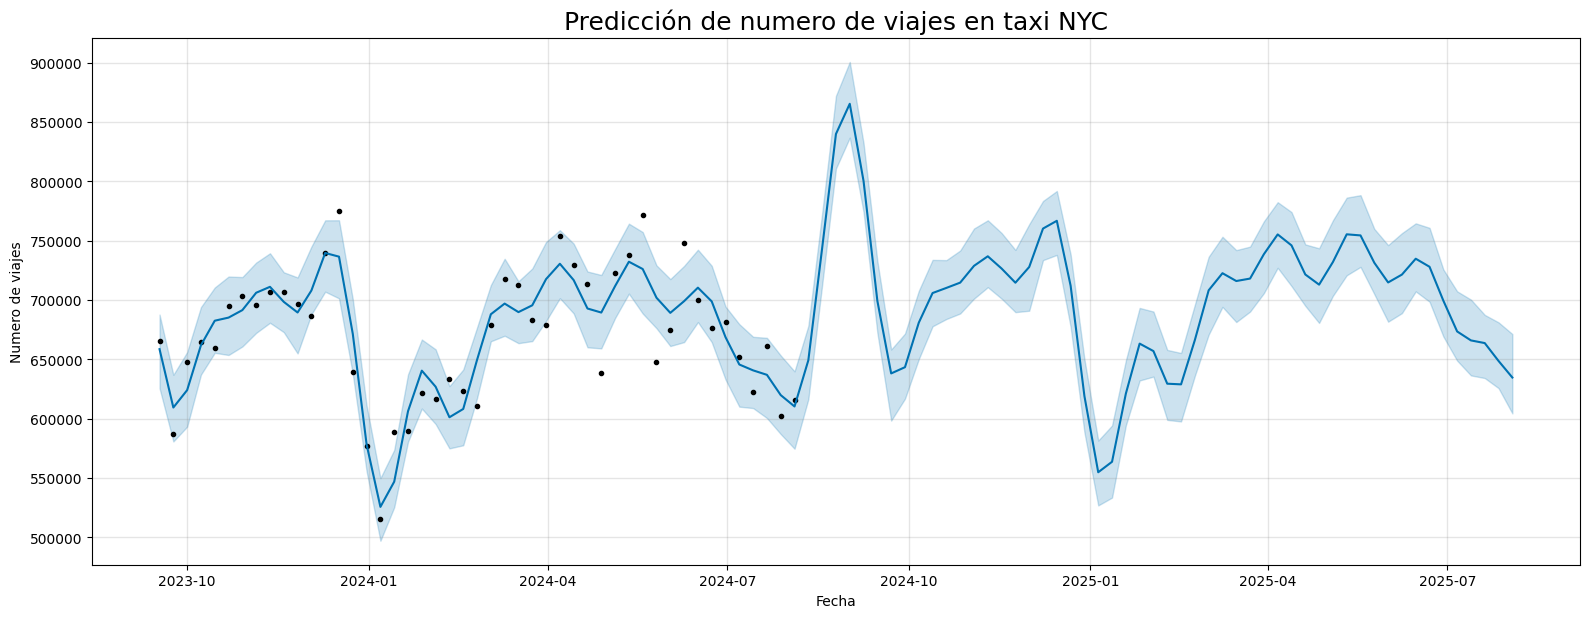

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

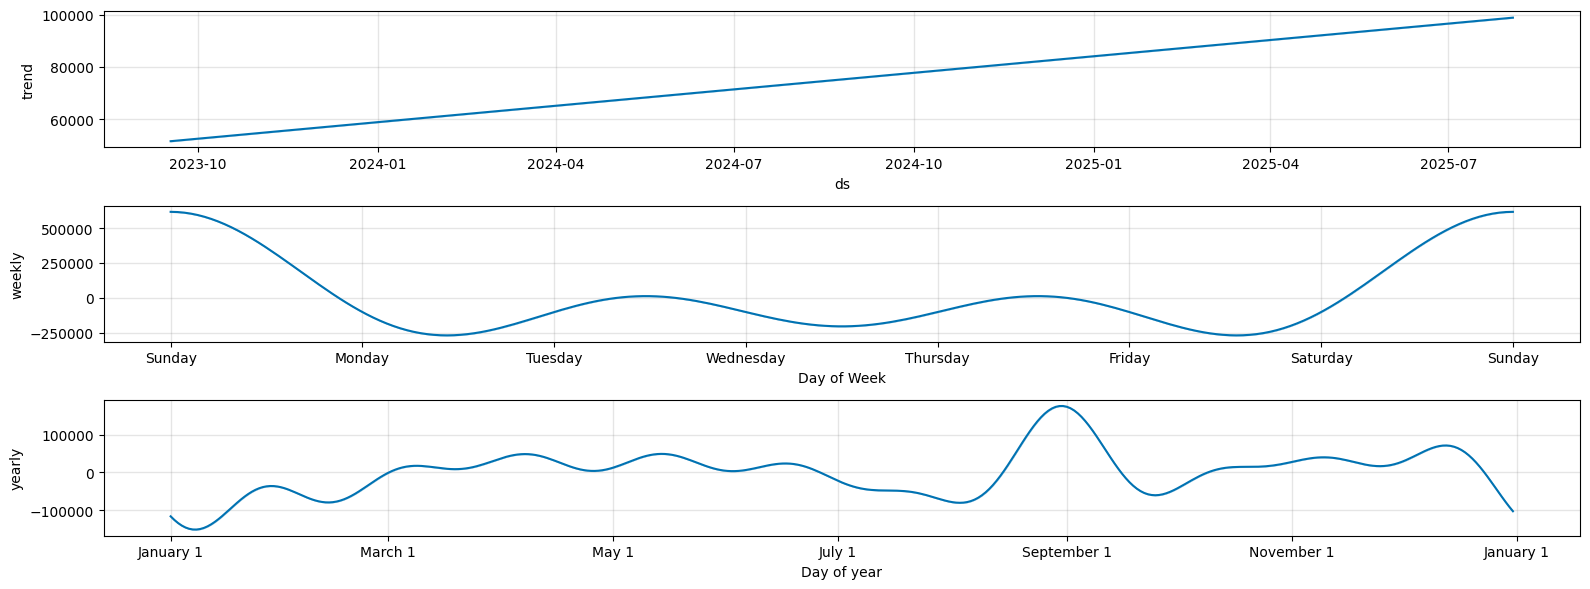

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 2

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, weekly_seasonality= True,uncertainty_samples = 100, mcmc_samples=100, interval_width= 0.8)
#daily_seasonality=False,    # Desactivar estacionalidad diaria
 #   yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
  #  weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
   # uncertainty_samples=100,    # Ajustar número de muestras para análisis de incertidumbre
    #interval_width=0.8
# Entrenamos el modelo
prophet.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/qskx2a0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/lacbi9mk.json
08:03:02 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21197', 'data', 'file=/tmp/tmp3k5_54x0/qskx2a0y.json', 'init=/tmp/tmp3k5_54x0/lacbi9mk.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=21197', 'data', 'file=/tmp/tmp3k5_54x0/qskx2a0y.json', 'init=/tmp/tmp3k5_54x0/lacbi9mk.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

08:03:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21197', 'data', 'file=/tmp/tmp3k5_54x0/qskx2a0y.json', 'init=/tmp/tmp3k5_54x0/lacbi9mk.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modelib0txqx7/prophet_model-20241113080303_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast

ds          trend    yhat_lower    yhat_upper   trend_lower  \
0  2023-09-17 -730373.254400  5.968743e+05  7.167758e+05 -6.026096e+06   
1  2023-09-24 -733999.357411  5.586992e+05  6.685810e+05 -6.029349e+06   
2  2023-10-01 -737450.530539  5.725661e+05  6.789323e+05 -6.032532e+06   
3  2023-10-08 -740901.703667  6.124195e+05  7.171498e+05 -6.040118e+06   
4  2023-10-15 -744244.172623  6.388577e+05  7.350742e+05 -6.056239e+06   
..        ...            ...           ...           ...           ...   
94 2025-07-06 -984376.990248 -2.471847e+06  3.263442e+06 -8.725434e+06   
95 2025-07-13 -986953.034721 -2.479434e+06  3.268166e+06 -8.776151e+06   
96 2025-07-20 -989529.079194 -2.493752e+06  3.258132e+06 -8.828387e+06   
97 2025-07-27 -992105.123667 -2.436203e+06  3.215387e+06 -8.881296e+06   
98 2025-08-03 -994681.168140 -2.467925e+06  3.205092e+06 -8.934050e+06   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   4.629727e+06    1.390348e+06         -3.998220e+06          6.710899e+06   
1   4.653481e+06    1.344967e+06         -4.037941e+06          6.666677e+06   
2   4.680061e+06    1.363549e+06         -4.065807e+06          6.677332e+06   
3   4.706642e+06    1.403312e+06         -4.071741e+06          6.726947e+06   
4   4.734082e+06    1.425682e+06         -4.055286e+06          6.771121e+06   
..           ...             ...                   ...                   ...   
94  5.996040e+06    1.498845e+06         -4.014215e+06          7.254563e+06   
95  6.039916e+06    1.491173e+06         -4.057885e+06          7.266479e+06   
96  6.083845e+06    1.491352e+06         -4.069700e+06          7.284692e+06   
97  6.125207e+06    1.481904e+06         -4.073063e+06          7.293364e+06   
98  6.165891e+06    1.470467e+06         -4.065709e+06          7.280144e+06   

          weekly  weekly_lower  weekly_upper         yearly  yearly_lower  \
0   1.476725e+06 -3.970972e+06  6.956969e+06  -86377.046476 -1.367841e+06   
1   1.476725e+06 -3.970972e+06  6.956969e+06 -131757.794488 -1.405816e+06   
2   1.476725e+06 -3.970972e+06  6.956969e+06 -113175.580019 -1.327382e+06   
3   1.476725e+06 -3.970972e+06  6.956969e+06  -73412.613714 -1.222411e+06   
4   1.476725e+06 -3.970972e+06  6.956969e+06  -51042.496701 -1.149352e+06   
..           ...           ...           ...            ...           ...   
94  1.476725e+06 -3.970972e+06  6.956969e+06   22120.549120 -8.971986e+05   
95  1.476725e+06 -3.970972e+06  6.956969e+06   14448.191398 -9.168939e+05   
96  1.476725e+06 -3.970972e+06  6.956969e+06   14626.909720 -9.698485e+05   
97  1.476725e+06 -3.970972e+06  6.956969e+06    5179.235990 -1.066158e+06   
98  1.476725e+06 -3.970972e+06  6.956969e+06   -6258.261701 -1.105690e+06   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0   1.009687e+06                   0.0                         0.0   
1   9.418714e+05                   0.0                         0.0   
2   8.859396e+05                   0.0                         0.0   
3   8.465855e+05                   0.0                         0.0   
4   8.217587e+05                   0.0                         0.0   
..           ...                   ...                         ...   
94  1.092518e+06                   0.0                         0.0   
95  1.128613e+06                   0.0                         0.0   
96  1.170946e+06                   0.0                         0.0   
97  1.269671e+06                   0.0                         0.0   
98  1.320288e+06                   0.0                         0.0   

    multiplicative_terms_upper           yhat  
0                          0.0  659974.628516  
1                          0.0  610967.777495  
2                          0.0  626098.818857  
3                          0.0  662410.611999  
4                          0.0  681438.260078  
..                         ...            ...  
94                         0.0  514468.488258  
95         

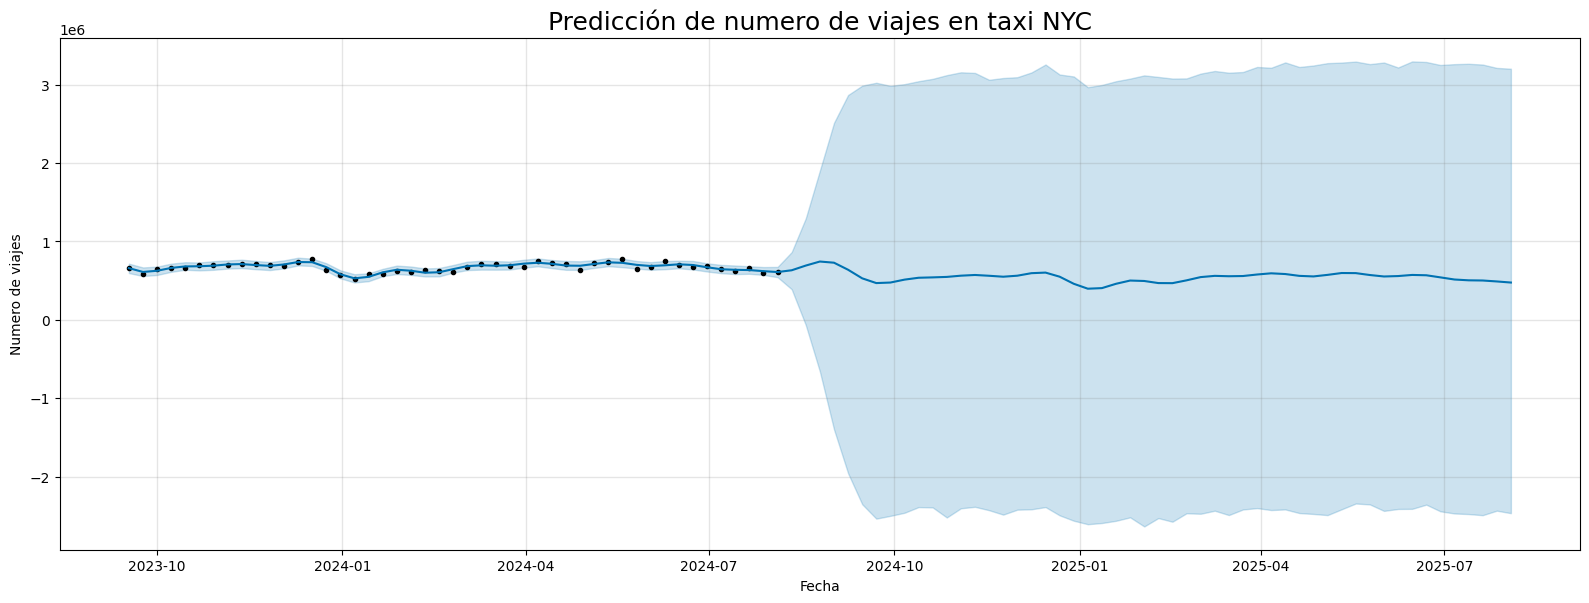

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

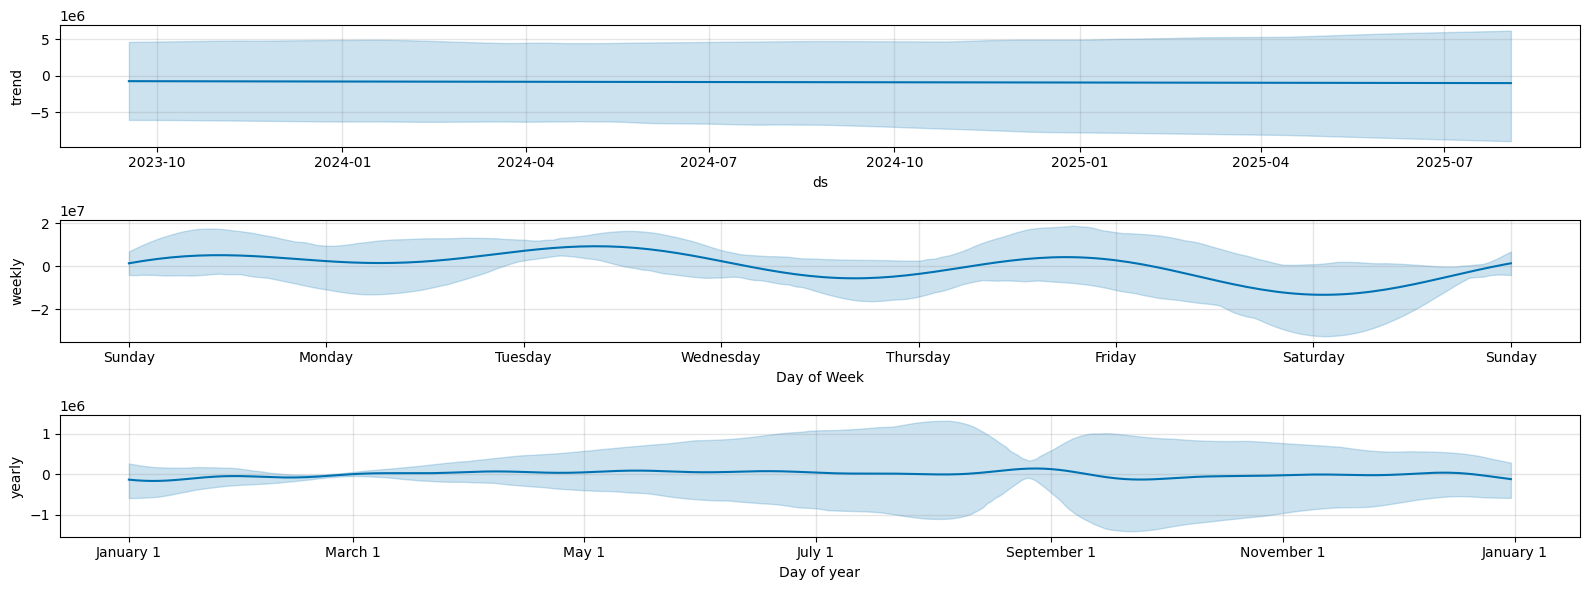

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 3

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, weekly_seasonality=True, daily_seasonality=True, uncertainty_samples = 60, mcmc_samples=60, interval_width= 0.6)
#daily_seasonality=False,    # Desactivar estacionalidad diaria
 #   yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
  #  weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
   # uncertainty_samples=100,    # Ajustar número de muestras para análisis de incertidumbre
    #interval_width=0.8
# Entrenamos el modelo
prophet.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast = prophet.predict(build_forecast)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/es8t9ymp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/f30z45qe.json
07:58:35 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=98740', 'data', 'file=/tmp/tmp3k5_54x0/es8t9ymp.json', 'init=/tmp/tmp3k5_54x0/f30z45qe.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model8gvqm402/prophet_model-20241113075835_1.csv', 'method=sample', 'num_samples=30', 'num_warmup=30', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=98740', 'data', 'file=/tmp/tmp3k5_54x0/es8t9ymp.json', 'init=/tmp/tmp3k5_54x0/f30z45qe.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model8gvqm402/prophet_model-20241113075835_2.csv', 'method=sample', 'num_samples=30', 'num_warmup=30', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

07:58:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=98740', 'data', 'file=/tmp/tmp3k5_54x0/es8t9ymp.json', 'init=/tmp/tmp3k5_54x0/f30z45qe.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model8gvqm402/prophet_model-20241113075835_1.csv', 'method=sample', 'num_samples=30', 'num_warmup=30', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_model8gvqm402/prophet_model-20241113075835_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_model8gvqm402/prophet_model-20241113075835_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 30
    num_warmup = 30
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast

ds         trend     yhat_lower    yhat_upper   trend_lower  \
0  2023-09-17  1.941203e+06  620444.826029  6.863463e+05  3.389208e+05   
1  2023-09-24  1.949482e+06  573650.383700  6.465238e+05  3.231273e+05   
2  2023-10-01  1.957743e+06  581442.638089  6.570839e+05  2.878257e+05   
3  2023-10-08  1.966004e+06  624422.807975  6.934633e+05  2.650702e+05   
4  2023-10-15  1.974103e+06  643473.584166  7.062326e+05  2.322622e+05   
..        ...           ...            ...           ...           ...   
94 2025-07-06  2.690756e+06 -265621.992917  2.797669e+06 -2.107377e+06   
95 2025-07-13  2.698644e+06 -229751.237004  2.784927e+06 -2.131179e+06   
96 2025-07-20  2.706531e+06 -238666.757276  2.759845e+06 -2.154672e+06   
97 2025-07-27  2.714419e+06 -290141.881630  2.708680e+06 -2.177589e+06   
98 2025-08-03  2.722306e+06 -291605.036403  2.741916e+06 -2.200057e+06   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   3.967366e+06   -1.288066e+06         -3.334225e+06          3.353226e+05   
1   4.011184e+06   -1.340761e+06         -3.370717e+06          2.935473e+05   
2   4.051239e+06   -1.338221e+06         -3.373735e+06          3.458063e+05   
3   4.061794e+06   -1.308376e+06         -3.378448e+06          3.912541e+05   
4   4.072867e+06   -1.291571e+06         -3.375515e+06          4.280741e+05   
..           ...             ...                   ...                   ...   
94  6.474879e+06   -1.634297e+06         -4.141619e+06          1.235500e+06   
95  6.536426e+06   -1.647757e+06         -4.197819e+06          1.246201e+06   
96  6.597958e+06   -1.655441e+06         -4.263523e+06          1.263982e+06   
97  6.659222e+06   -1.680362e+06         -4.301058e+06          1.259077e+06   
98  6.720759e+06   -1.704162e+06         -4.334837e+06          1.241478e+06   

           daily  ...        weekly  weekly_lower  weekly_upper  \
0  -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
1  -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
2  -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
3  -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
4  -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
..           ...  ...           ...           ...           ...   
94 -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
95 -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
96 -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
97 -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   
98 -2.576707e+06  ...  1.125587e+06 -4.184186e+06  6.808317e+06   

           yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0   163054.265325 -407792.087424  911683.008154                   0.0   
1   110359.575736 -450488.426924  843848.488879                   0.0   
2   112898.823675 -414817.991463  810320.978851                   0.0   
3   142744.347575 -358254.348166  809212.629638                   0.0   
4   159549.349846 -324886.884627  771769.106060                   0.0   
..            ...            ...            ...                   ...   
94 -183177.214106 -798770.621247  289612.157687                   0.0   
95 -196637.111996 -842753.539414  293994.002989                   0.0   
96 -204321.238348 -889004.700329  313442.277191                   0.0   
97 -229241.872366 -948524.225997  323115.626089                   0.0   
98 -253041.583277 -998787.267045  327697.880750                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                          0.0                         0.0  6.531372e+05  
1                          0.0                         0.0  6.087212e+05  
2                          0.0                         0.0  6.195215e+05  
3                          0.0                         0.0  6.576281e+05  
4                          0.0                         0.0  6.825325e+05  
..                         ..

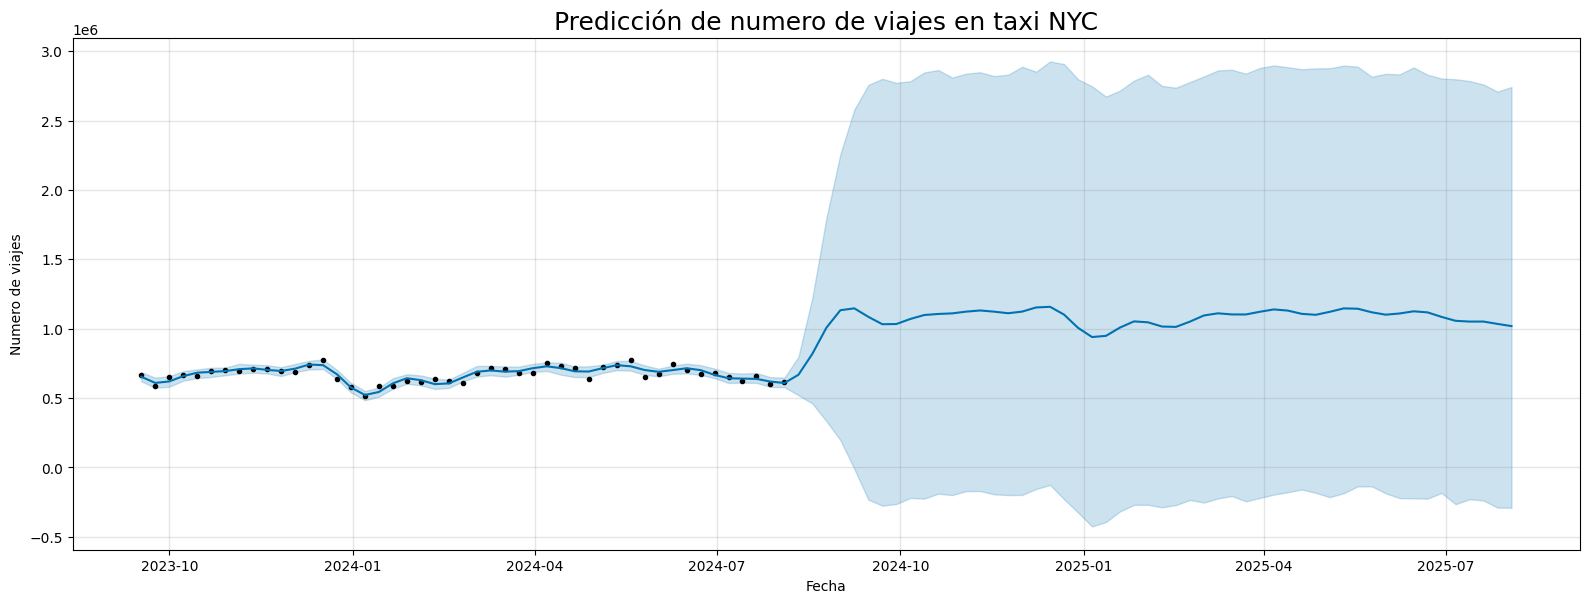

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

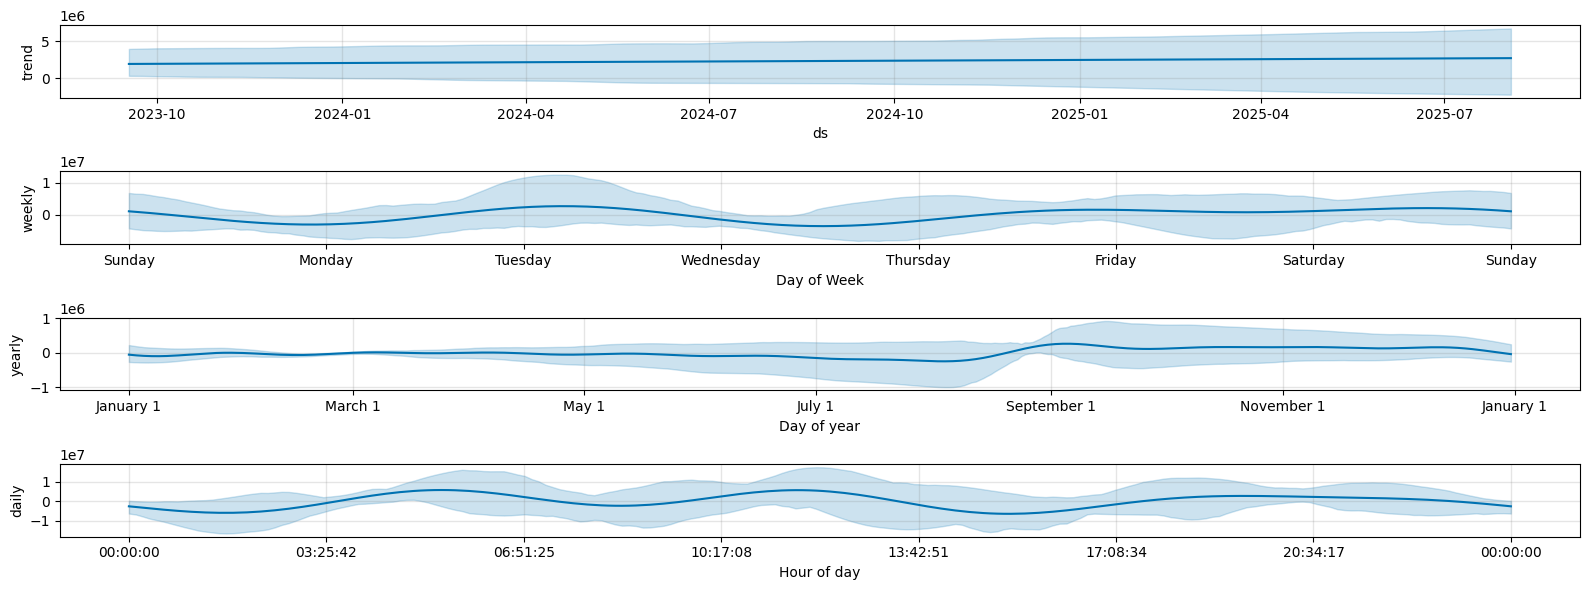

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 4

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, weekly_seasonality=True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)
#daily_seasonality=False,    # Desactivar estacionalidad diaria
 #   yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
  #  weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
   # uncertainty_samples=100,    # Ajustar número de muestras para análisis de incertidumbre
    #interval_width=0.8
# Entrenamos el modelo
prophet.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/ui2m2hqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/zgx403us.json
07:44:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=30868', 'data', 'file=/tmp/tmp3k5_54x0/ui2m2hqq.json', 'init=/tmp/tmp3k5_54x0/zgx403us.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model0s6lapg2/prophet_model-20241113074419_1.csv', 'method=sample', 'num_samples=12', 'num_warmup=12', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=30868', 'data', 'file=/tmp/tmp3k5_54x0/ui2m2hqq.json', 'init=/tmp/tmp3k5_54x0/zgx403us.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model0s6lapg2/prophet_model-20241113074419_2.csv', 'method=sample', 'num_samples=12', 'num_warmup=12', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

07:44:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=30868', 'data', 'file=/tmp/tmp3k5_54x0/ui2m2hqq.json', 'init=/tmp/tmp3k5_54x0/zgx403us.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model0s6lapg2/prophet_model-20241113074419_1.csv', 'method=sample', 'num_samples=12', 'num_warmup=12', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_model0s6lapg2/prophet_model-20241113074419_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_model0s6lapg2/prophet_model-20241113074419_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 12
    num_warmup = 12
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2023-09-17 -1.858520e+06  6.170000e+05  7.091335e+05 -4.460649e+06   
1  2023-09-24 -1.845619e+06  5.830196e+05  6.746504e+05 -4.457290e+06   
2  2023-10-01 -1.832346e+06  5.784788e+05  6.547009e+05 -4.453397e+06   
3  2023-10-08 -1.819074e+06  6.279254e+05  7.037052e+05 -4.449504e+06   
4  2023-10-15 -1.805665e+06  6.340489e+05  7.194489e+05 -4.446671e+06   
..        ...           ...           ...           ...           ...   
94 2025-07-06 -5.868344e+05 -9.976602e+05  6.203752e+06 -6.970322e+06   
95 2025-07-13 -5.731443e+05 -1.003420e+06  6.247965e+06 -7.005270e+06   
96 2025-07-20 -5.594542e+05 -9.605931e+05  6.264363e+06 -7.039779e+06   
97 2025-07-27 -5.457641e+05 -9.178971e+05  6.222598e+06 -7.074314e+06   
98 2025-08-03 -5.320741e+05 -9.903289e+05  6.283979e+06 -7.109116e+06   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   2.962328e+04    2.519262e+06          5.644068e+05          5.136527e+06   
1   1.467032e+05    2.463667e+06          5.089359e+05          5.064912e+06   
2   2.638938e+05    2.460565e+06          3.219585e+05          5.059305e+06   
3   3.455453e+05    2.481005e+06          2.879663e+05          5.090645e+06   
4   4.381420e+05    2.486829e+06          2.170253e+05          5.120925e+06   
..           ...             ...                   ...                   ...   
94  1.026336e+07    1.948721e+06         -3.733928e+06          5.922043e+06   
95  1.037623e+07    1.925907e+06         -3.840570e+06          5.902586e+06   
96  1.048919e+07    1.903872e+06         -3.971350e+06          5.914856e+06   
97  1.060155e+07    1.868773e+06         -4.143984e+06          5.959897e+06   
98  1.071332e+07    1.855153e+06         -4.236789e+06          6.001857e+06   

          weekly  weekly_lower  weekly_upper         yearly  yearly_lower  \
0   2.235331e+06 -1.667931e+06  5.289441e+06  283931.002496 -7.969195e+05   
1   2.235331e+06 -1.667931e+06  5.289441e+06  228335.924794 -8.233266e+05   
2   2.235331e+06 -1.667931e+06  5.289441e+06  225234.046697 -7.565235e+05   
3   2.235331e+06 -1.667931e+06  5.289441e+06  245673.669966 -6.829159e+05   
4   2.235331e+06 -1.667931e+06  5.289441e+06  251498.172765 -6.392522e+05   
..           ...           ...           ...            ...           ...   
94  2.235331e+06 -1.667931e+06  5.289441e+06 -286609.913510 -2.086890e+06   
95  2.235331e+06 -1.667931e+06  5.289441e+06 -309424.155577 -2.193532e+06   
96  2.235331e+06 -1.667931e+06  5.289441e+06 -331459.147366 -2.324313e+06   
97  2.235331e+06 -1.667931e+06  5.289441e+06 -366557.876322 -2.475161e+06   
98  2.235331e+06 -1.667931e+06  5.289441e+06 -380178.033323 -2.589751e+06   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0   2.469458e+06                   0.0                         0.0   
1   2.417997e+06                   0.0                         0.0   
2   2.264406e+06                   0.0                         0.0   
3   2.148990e+06                   0.0                         0.0   
4   2.070310e+06                   0.0                         0.0   
..           ...                   ...                         ...   
94  5.887954e+05                   0.0                         0.0   
95  6.291528e+05                   0.0                         0.0   
96  6.592473e+05                   0.0                         0.0   
97  6.340818e+05                   0.0                         0.0   
98  6.350679e+05                   0.0                         0.0   

    multiplicative_terms_upper          yhat  
0                          0.0  6.607419e+05  
1                          0.0  6.180475e+05  
2                          0.0  6.282185e+05  
3                          0.0  6.619310e+05  
4                          0.0  6.811639e+05  
..                         ...           ...  
94                         0.0  1.361887e+06  
95                         0.0 

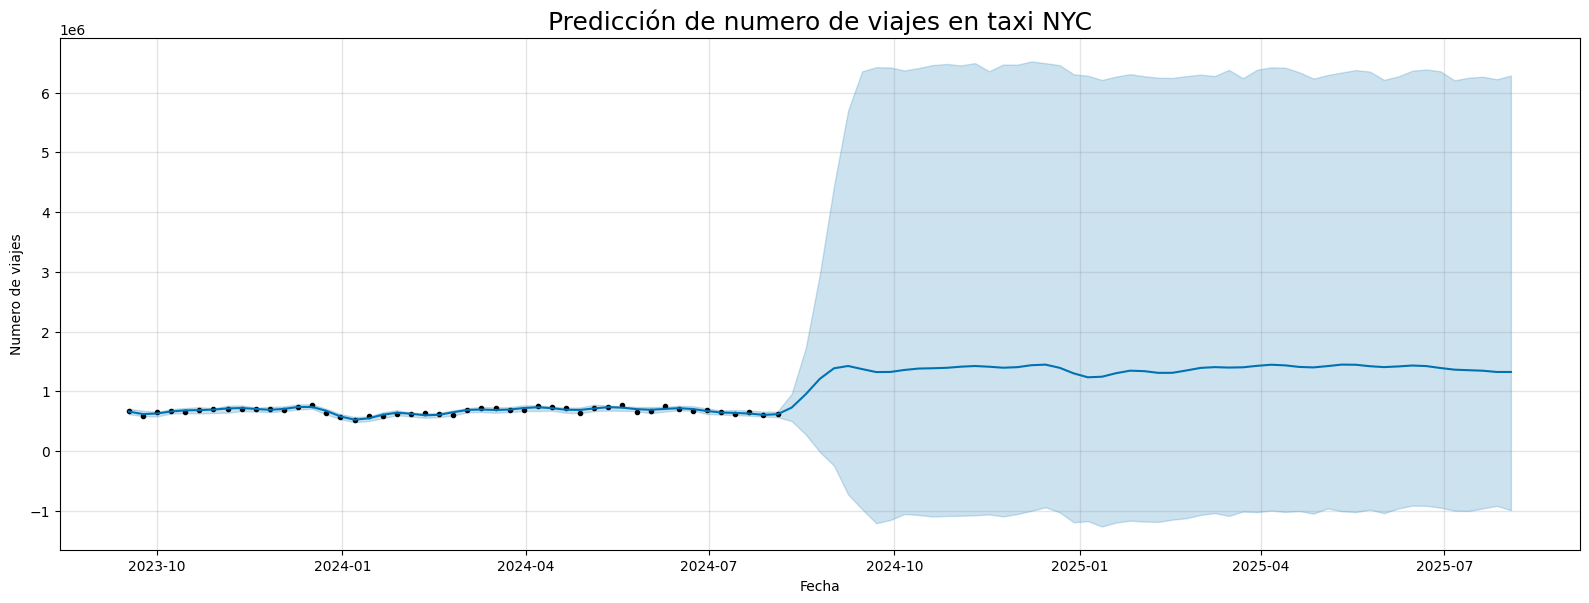

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

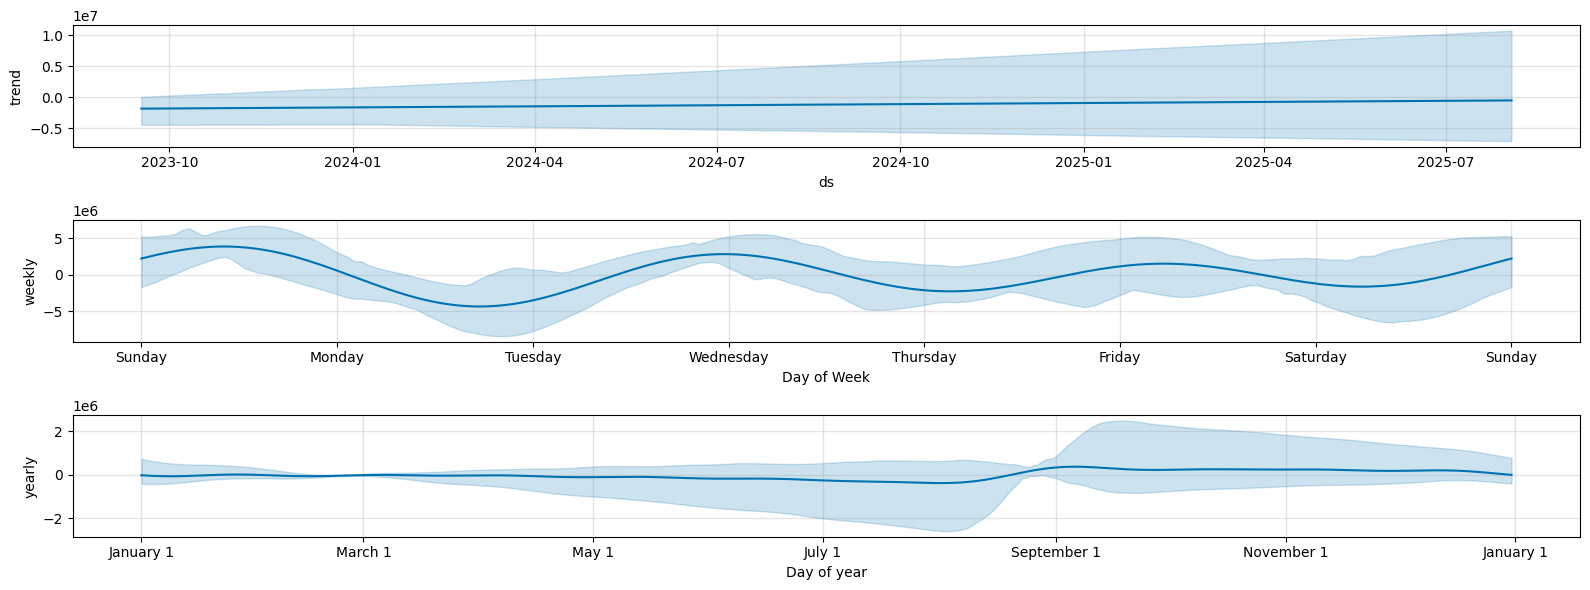

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

# Diarios

In [ ]:
diario

passenger_count  trip_distance  total_amount      duration  \
pickup_datetime                                                               
2023-09-05                107088      152369.55    1746995.00  1.040973e+06   
2023-09-06                125811      179210.26    2181041.47  1.381579e+06   
2023-09-07                139797      199385.39    2453146.14  1.579063e+06   
2023-09-08                136767      187498.75    2299946.76  1.473957e+06   
2023-09-09                140098      190146.87    2148279.09  1.380598e+06   
...                          ...            ...           ...           ...   
2024-08-27                 98516      146679.70    1609748.37  9.515316e+05   
2024-08-28                108751      160149.37    1784692.83  1.066715e+06   
2024-08-29                103821      153148.11    1709506.17  1.041402e+06   
2024-08-30                100434      144432.82    1551276.87  9.210651e+05   
2024-08-31                104928      149684.14    1467018.96  8.730106e+05   

                  n_trips  
pickup_datetime            
2023-09-05        84509.0  
2023-09-06       100073.0  
2023-09-07       110657.0  
2023-09-08       104886.0  
2023-09-09       100666.0  
...                   ...  
2024-08-27        78550.0  
2024-08-28        87026.0  
2024-08-29        82257.0  
2024-08-30        75844.0  
2024-08-31        73781.0  

[362 rows x 5 columns]

In [ ]:
diario_p = diario['n_trips']

In [ ]:
diario_p

pickup_datetime
2023-09-05     84509.0
2023-09-06    100073.0
2023-09-07    110657.0
2023-09-08    104886.0
2023-09-09    100666.0
                ...   
2024-08-27     78550.0
2024-08-28     87026.0
2024-08-29     82257.0
2024-08-30     75844.0
2024-08-31     73781.0
Name: n_trips, Length: 362, dtype: float64

In [ ]:
diario_p = diario_p.reset_index()

In [ ]:
diario_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
diario_p

ds         y
0   2023-09-05   84509.0
1   2023-09-06  100073.0
2   2023-09-07  110657.0
3   2023-09-08  104886.0
4   2023-09-09  100666.0
..         ...       ...
357 2024-08-27   78550.0
358 2024-08-28   87026.0
359 2024-08-29   82257.0
360 2024-08-30   75844.0
361 2024-08-31   73781.0

[362 rows x 2 columns]

## Modelo 1

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/107u1ag7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/4c2kjh8e.json
07:06:46 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=18356', 'data', 'file=/tmp/tmp3k5_54x0/107u1ag7.json', 'init=/tmp/tmp3k5_54x0/4c2kjh8e.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modellqp9c46l/prophet_model-20241113070647_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=18356', 'data', 'file=/tmp/tmp3k5_54x0/107u1ag7.json', 'init=/tmp/tmp3k5_54x0/4c2kjh8e.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modellqp9c46l/prophet_model-20241113070647_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

07:06:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=18356', 'data', 'file=/tmp/tmp3k5_54x0/107u1ag7.json', 'init=/tmp/tmp3k5_54x0/4c2kjh8e.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modellqp9c46l/prophet_model-20241113070647_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modellqp9c46l/prophet_model-20241113070647_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modellqp9c46l/prophet_model-20241113070647_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0   2023-09-05  99776.840631  80194.541421  105560.333491  96634.661334   
1   2023-09-06  99711.420807  86114.602948  103069.639346  96612.648243   
2   2023-09-07  99646.000983  93892.357837  108165.174573  96590.635151   
3   2023-09-08  99580.581158  83174.101687  101495.104448  96568.622060   
4   2023-09-09  99515.161334  90970.455517  107860.661065  96546.608968   
..         ...           ...           ...            ...           ...   
722 2025-08-27  78181.286246  51420.838609   93763.406883  52714.427269   
723 2025-08-28  78151.213201  50747.442295   96556.158845  52623.035693   
724 2025-08-29  78121.140157  51260.761432   96794.273076  52555.933773   
725 2025-08-30  78091.067113  51306.592674   92506.445167  52487.758739   
726 2025-08-31  78060.994068  33766.963505   81538.678901  52419.583704   

       trend_upper  additive_terms  additive_terms_lower  \
0    106259.379537    -8744.780342         -13075.597922   
1    106171.742049    -2548.006092          -3749.398514   
2    106084.104560      -29.496797          -4451.228056   
3    105996.467072    -4124.343639          -7140.274996   
4    105908.829584    -2443.380520          -6840.534056   
..             ...             ...                   ...   
722   97748.375985    -4314.324850         -11844.643832   
723   97744.530794    -1514.490193          -7378.538504   
724   97736.734812    -5327.294052         -10745.296471   
725   97724.988040    -3375.810965          -7929.802066   
726   97713.241267   -21276.914463         -24605.220161   

     additive_terms_upper        weekly  weekly_lower  weekly_upper  \
0            -5736.685360    228.923298   -371.512445    462.770134   
1            -1498.177202   6375.151416   4057.214559   7306.912339   
2             2520.535190   8867.720479   7944.857760  10935.080843   
3            -2632.450505   4766.389207   4625.751101   5690.316109   
4             1007.559892   6454.678392   5942.974129   7846.794537   
..                    ...           ...           ...           ...   
722           1436.524875   6375.151416   4057.214559   7306.912339   
723           1190.204351   8867.720479   7944.857760  10935.080843   
724           -857.672490   4766.389207   4625.751101   5690.316109   
725            564.350419   6454.678392   5942.974129   7846.794537   
726         -19670.550882 -11679.329207 -12796.698932 -10248.997674   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -8973.703640 -12980.775458  -7173.147359                   0.0   
1    -8923.157508 -12941.747154  -7290.792877                   0.0   
2    -8897.217276 -12905.677560  -7422.543444                   0.0   
3    -8890.732846 -12868.405064  -7469.349710                   0.0   
4    -8898.058912 -12825.546763  -7566.487222                   0.0   
..            ...           ...           ...                   ...   
722 -10689.476266 -17206.400397  -6845.500964                   0.0   
723 -10382.210672 -16450.397709  -6678.767347                   0.0   
724 -10093.683260 -15678.656108  -6555.812751                   0.0   
725  -9830.489357 -14905.351411  -6518.255698                   0.0   
726  -9597.585255 -14120.287974  -6570.972976                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  91032.060289  
1                           0.0                         0.0  97163.414714  
2                           0.0                         0.0  99616.504185  
3                           0.0                         0.0  95456.237520  
4                           0.0                         0.0  97071.780814  
..                          ...                         ...           ...  
722                         0.0                         0.0  73866.961396  
723                         0.0                         0.0  76636.723008  


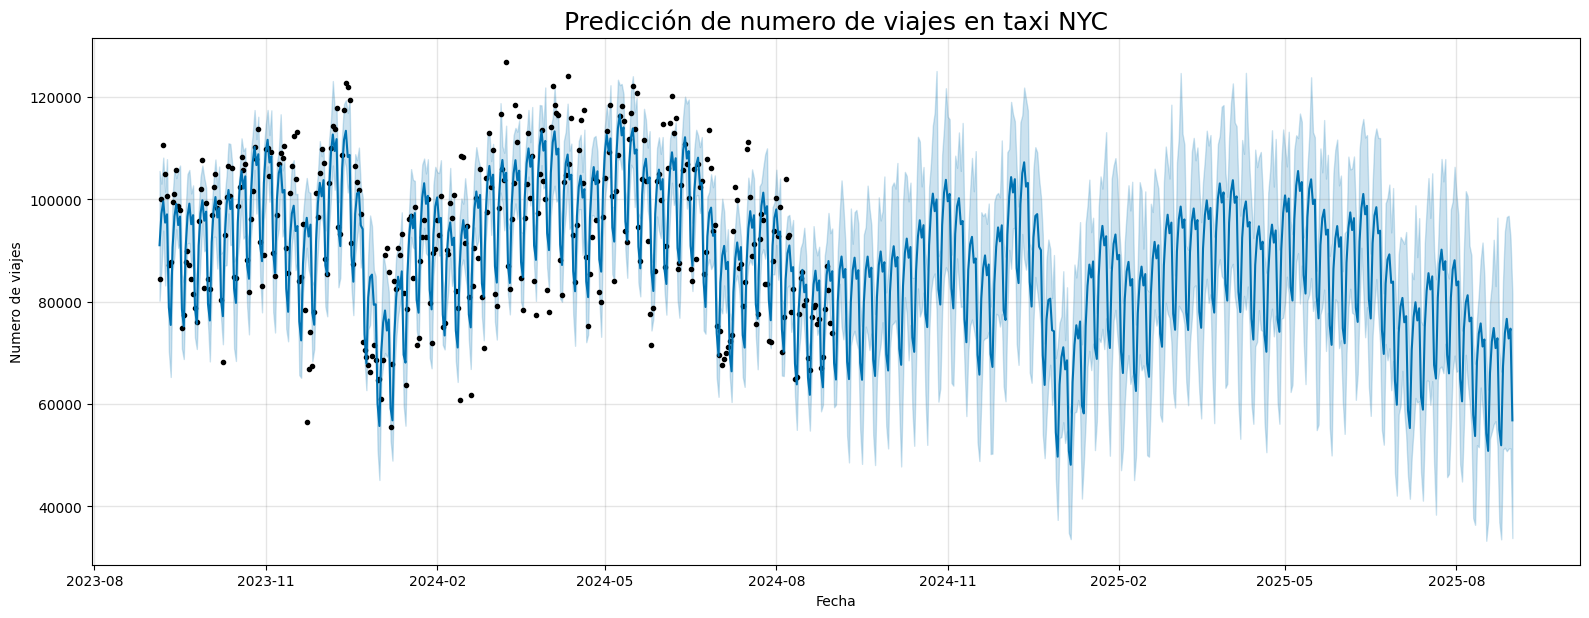

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

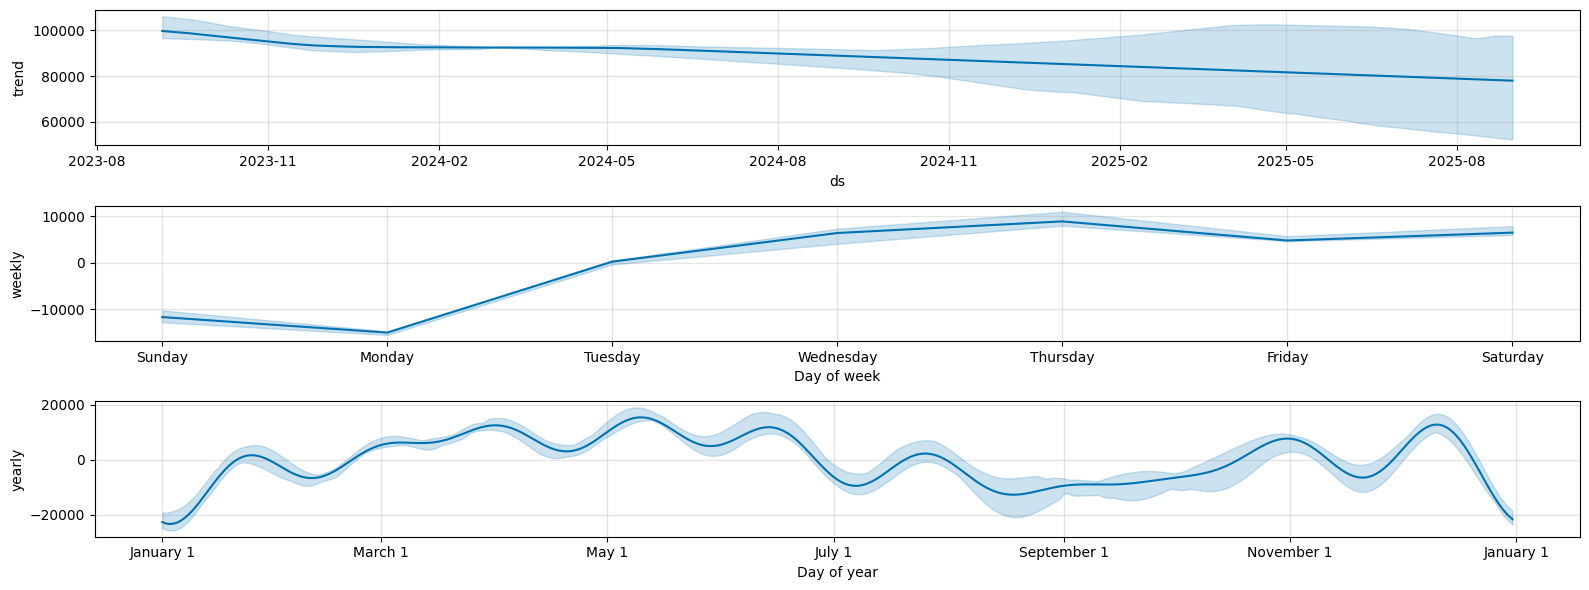

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 2

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(
    daily_seasonality=True,    # Activar estacionalidad diaria
    yearly_seasonality=True,   # Mantener la estacionalidad anual
    weekly_seasonality=True,   # Activar la estacionalidad semanal si existen patrones semanales
    uncertainty_samples=80,
    mcmc_samples=80,# Ajustar el número de muestras para un mejor análisis de incertidumbre
    interval_width=0.6         # Intervalo de confianza del 80%
)

# Entrenamos el modelo
prophet.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast = prophet.predict(build_forecast)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/m4y5z8g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/902moj41.json
07:47:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=87607', 'data', 'file=/tmp/tmp3k5_54x0/m4y5z8g1.json', 'init=/tmp/tmp3k5_54x0/902moj41.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelucmj5oiu/prophet_model-20241113074703_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=87607', 'data', 'file=/tmp/tmp3k5_54x0/m4y5z8g1.json', 'init=/tmp/tmp3k5_54x0/902moj41.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelucmj5oiu/prophet_model-20241113074703_2.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

07:47:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=87607', 'data', 'file=/tmp/tmp3k5_54x0/m4y5z8g1.json', 'init=/tmp/tmp3k5_54x0/902moj41.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelucmj5oiu/prophet_model-20241113074703_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modelucmj5oiu/prophet_model-20241113074703_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modelucmj5oiu/prophet_model-20241113074703_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 40
    num_warmup = 40
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2023-09-05  137167.294574   94747.519817  107544.428069 -209556.014160   
1   2023-09-06  137082.647883   98045.760656  112772.607247 -209731.116325   
2   2023-09-07  136998.001192  100381.693897  116197.729733 -209906.218490   
3   2023-09-08  136913.354501   92971.782779  109563.091272 -209996.297638   
4   2023-09-09  136828.707810   95898.177201  109685.170059 -210075.814518   
..         ...            ...            ...            ...            ...   
722 2025-08-27   71975.703530   16851.134784   83014.665546 -275581.270302   
723 2025-08-28   71885.268678   18602.942001   87398.665243 -275749.614294   
724 2025-08-29   71794.833825   12130.591676   84193.925079 -275916.565694   
725 2025-08-30   71704.398972   11318.231373   82887.088299 -276082.124500   
726 2025-08-31   71613.964119   -7683.892379   64012.560089 -276245.739676   

       trend_upper  additive_terms  additive_terms_lower  \
0    613864.912056   -36737.948257        -513808.013929   
1    613569.936743   -32006.884088        -509377.140933   
2    613274.961430   -29232.580289        -504919.220798   
3    612979.986118   -36287.575593        -512886.068763   
4    612685.010805   -34109.154207        -510075.579672   
..             ...             ...                   ...   
722  539961.893225   -23935.975852        -501172.338715   
723  539898.110927   -20565.045113        -497922.078884   
724  539836.355991   -27134.140139        -505975.367655   
725  539774.601055   -24597.020935        -503462.391251   
726  539712.846119   -44451.213337        -521729.951154   

     additive_terms_upper         daily  ...        weekly  weekly_lower  \
0           307390.454438 -27865.963733  ...    119.954927   -880.185098   
1           313034.564883 -27865.963749  ...   5942.410028   5053.577508   
2           315119.560282 -27865.963747  ...   9812.844226   8936.648086   
3           309181.000225 -27865.963744  ...   3840.684893   2934.114165   
4           309219.821249 -27865.963739  ...   7070.757021   6230.643411   
..                    ...           ...  ...           ...           ...   
722         321528.860935 -27865.963730  ...   5942.410028   5053.577508   
723         323970.916533 -27865.963747  ...   9812.844226   8936.648086   
724         317920.542461 -27865.963744  ...   3840.684893   2934.114165   
725         320606.448868 -27865.963739  ...   7070.757022   6230.643411   
726         299659.844680 -27865.963736  ... -11998.927251 -12829.634794   

     weekly_upper        yearly  yearly_lower  yearly_upper  \
0     1105.394517  -8991.939451 -13183.379768  -4794.609850   
1     6900.969948 -10083.330367 -14408.487981  -6029.477624   
2    10711.935141 -11179.460769 -15603.291252  -6973.483607   
3     4722.428986 -12262.296742 -16855.627108  -7844.008432   
4     8035.606902 -13313.947490 -18039.646151  -8538.970015   
..            ...           ...           ...           ...   
722   6900.969948  -2012.422150  -6799.228168   2547.451355   
723  10711.935141  -2511.925593  -7376.440552   1916.252901   
724   4722.428986  -3108.861288  -7972.175957   1157.673994   
725   8035.606902  -3801.814218  -8551.092881    338.336252   
726 -10940.355506  -4586.322350  -9592.313679   -424.565748   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
722                   0.0                         0.0   
723                   0.0                         0.0   
724                   0.0                         0.0   
725                   0.0                         0.0   
726                   0.0                         0.0   


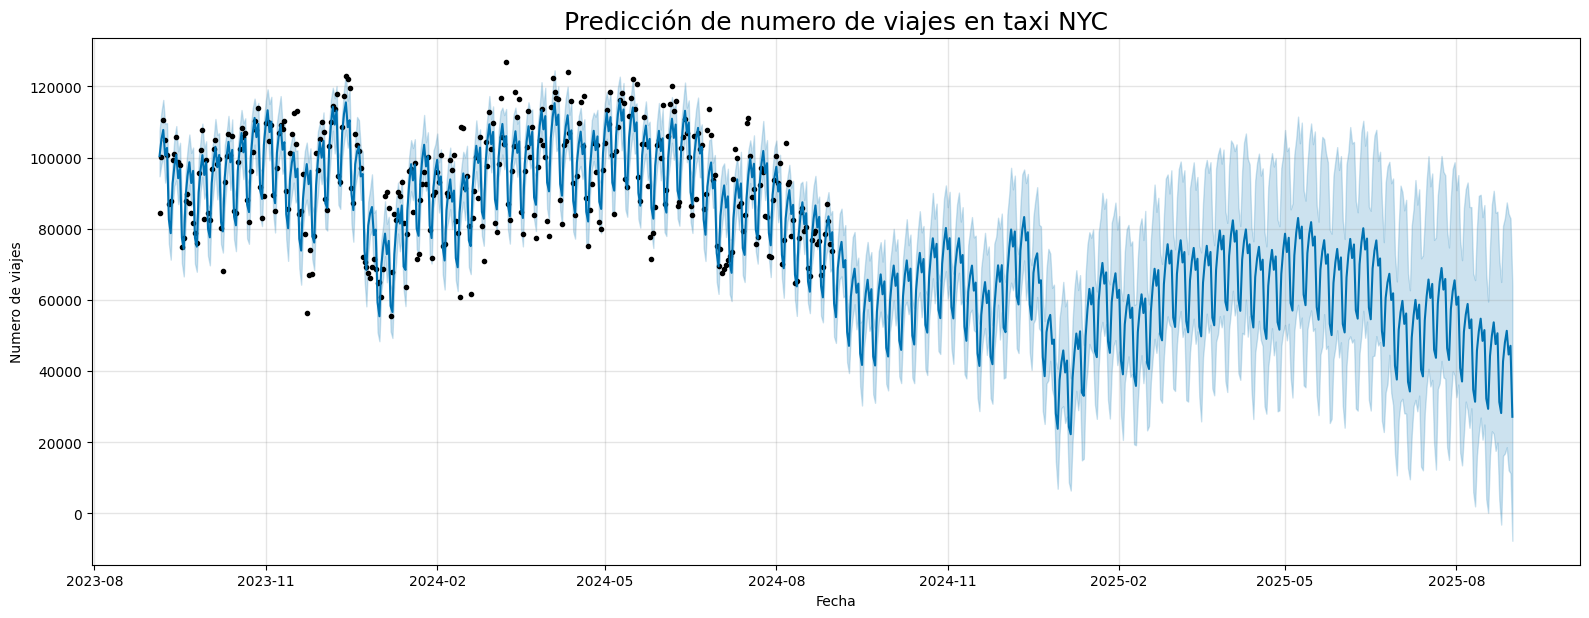

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

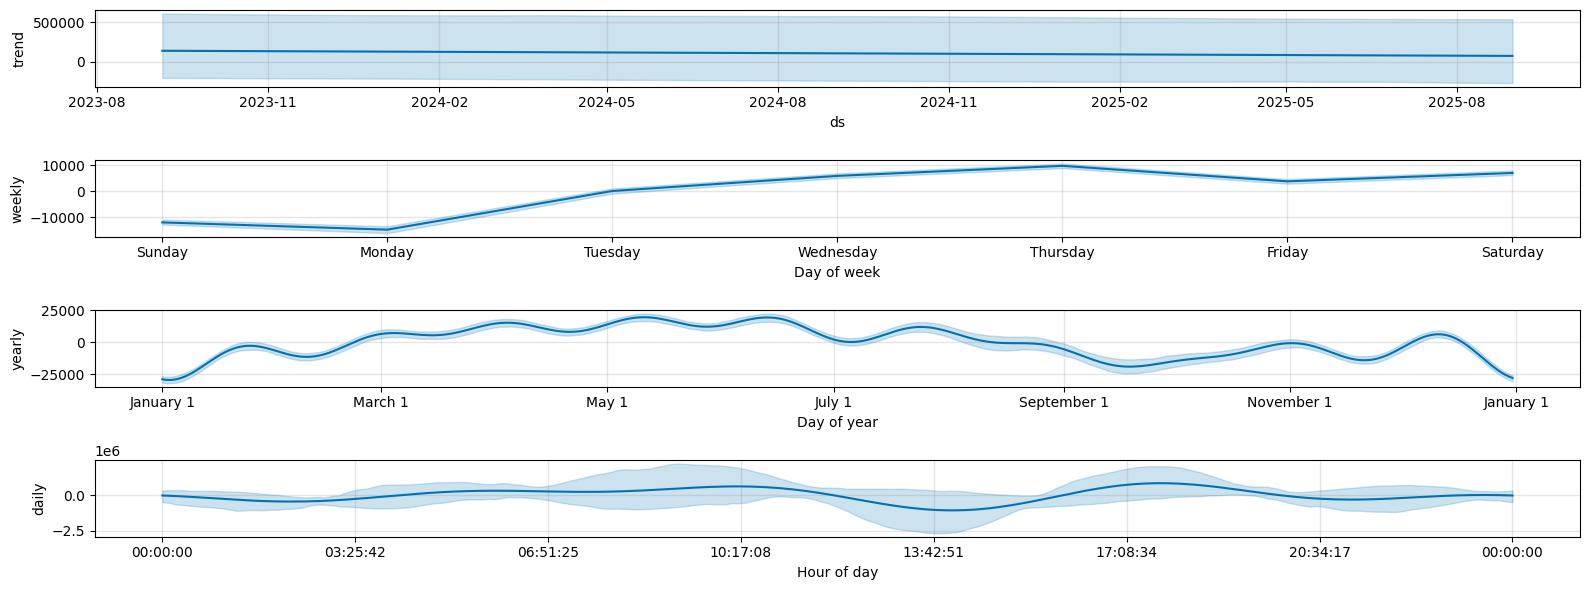

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

### Modelos 3 -2 sin weekly

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(
    daily_seasonality=True,    # Activar estacionalidad diaria
    yearly_seasonality=True,   # Mantener la estacionalidad anual
    uncertainty_samples=80,
    mcmc_samples=80,# Ajustar el número de muestras para un mejor análisis de incertidumbre
    interval_width=0.6         # Intervalo de confianza del 80%
)

# Entrenamos el modelo
prophet.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast = prophet.predict(build_forecast)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/ohpq98s8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/696j7fm_.json
07:48:34 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=20614', 'data', 'file=/tmp/tmp3k5_54x0/ohpq98s8.json', 'init=/tmp/tmp3k5_54x0/696j7fm_.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model7_si1ail/prophet_model-20241113074834_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=20614', 'data', 'file=/tmp/tmp3k5_54x0/ohpq98s8.json', 'init=/tmp/tmp3k5_54x0/696j7fm_.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model7_si1ail/prophet_model-20241113074834_2.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

07:48:52 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=20614', 'data', 'file=/tmp/tmp3k5_54x0/ohpq98s8.json', 'init=/tmp/tmp3k5_54x0/696j7fm_.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model7_si1ail/prophet_model-20241113074834_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_model7_si1ail/prophet_model-20241113074834_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_model7_si1ail/prophet_model-20241113074834_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 40
    num_warmup = 40
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast

ds          trend    yhat_lower     yhat_upper   trend_lower  \
0   2023-09-05  275588.769272  92008.512806  107466.795746  91128.280997   
1   2023-09-06  275505.115539  97358.092055  111532.009923  91074.328211   
2   2023-09-07  275421.461807  99853.986026  115676.683701  91020.375426   
3   2023-09-08  275337.808074  93217.471177  108300.478951  90966.422641   
4   2023-09-09  275254.154341  95937.839731  109567.748408  90912.469855   
..         ...            ...           ...            ...           ...   
722 2025-08-27  211880.109143  18294.969454   74293.739845  31550.803365   
723 2025-08-28  211791.031948  19457.382474   77247.459554  31580.196475   
724 2025-08-29  211701.954753  15234.782808   66320.343509  31609.589584   
725 2025-08-30  211612.877558  14034.657077   73193.317309  31638.982694   
726 2025-08-31  211523.800363  -3389.801088   54575.184771  31668.375804   

       trend_upper  additive_terms  additive_terms_lower  \
0    425859.040248  -175602.832154        -327684.779390   
1    425791.417027  -170972.785214        -323379.754607   
2    425723.793806  -168074.721537        -318432.634298   
3    425656.170585  -175266.670148        -328208.548275   
4    425588.547364  -172957.213030        -326257.725786   
..             ...             ...                   ...   
722  374258.623661  -163301.678012        -316841.081317   
723  374165.589745  -159844.529990        -312681.232341   
724  374072.555828  -166585.215634        -319944.669835   
725  373979.521912  -163948.019939        -316393.325732   
726  373886.487995  -183750.050760        -335518.248310   

     additive_terms_upper          daily  ...        weekly  weekly_lower  \
0              395.853527 -166745.878520  ...    277.765760   -550.535682   
1             6801.383104 -166745.878519  ...   5940.712778   5159.360281   
2            11596.614915 -166745.878535  ...   9874.065306   8960.883940   
3             3029.432913 -166745.878551  ...   3702.408280   2879.816017   
4             7627.839289 -166745.878523  ...   6999.968542   6150.149537   
..                    ...            ...  ...           ...           ...   
722           8972.562644 -166745.878536  ...   5940.712778   5159.360281   
723          12722.983241 -166745.878534  ...   9874.065306   8960.883940   
724           6412.765786 -166745.878551  ...   3702.408280   2879.816017   
725          10157.390738 -166745.878522  ...   6999.968542   6150.149537   
726         -10184.192604 -166745.878539  ... -12054.807470 -12985.379834   

     weekly_upper        yearly  yearly_lower  yearly_upper  \
0     1030.693132  -9134.719393 -13384.813115  -4939.076810   
1     6766.306814 -10167.619473 -14472.007334  -5844.513408   
2    10698.925276 -11202.908308 -15546.203250  -6761.648706   
3     4417.462416 -12223.199877 -16684.069757  -7647.449537   
4     7904.254417 -13211.303049 -17557.848464  -8479.201827   
..            ...           ...           ...           ...   
722   6766.306814  -2496.512254  -6916.497639   2118.213788   
723  10698.925276  -2972.716762  -7172.628617   1425.160856   
724   4417.462416  -3541.745363  -7553.596970    736.595846   
725   7904.254417  -4202.109958  -8131.775341    108.759359   
726 -11285.380107  -4949.364752  -9044.086613   -936.216515   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
722                   0.0                         0.0   
723                   0.0                         0.0   
724                   0.0                         0.0   
725                   0.0                         0.0   
726                   0.0                         0.0   

     multip

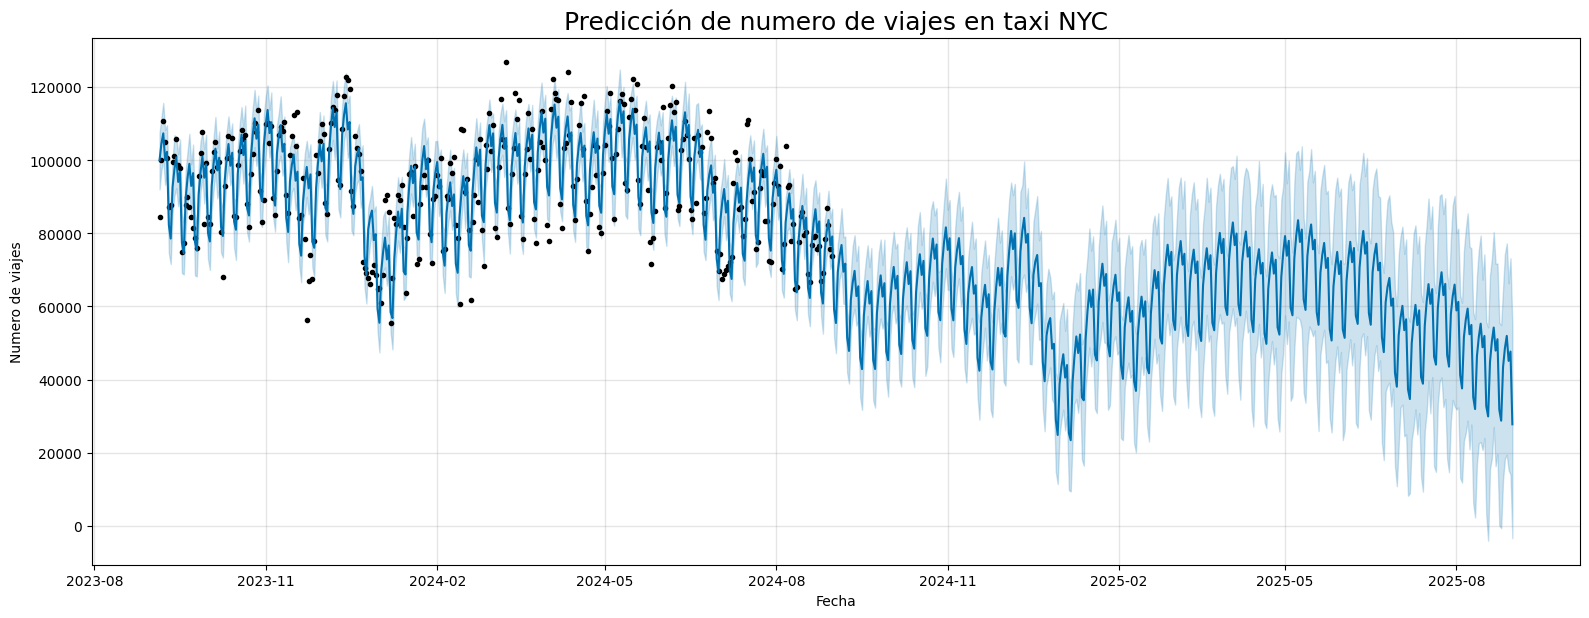

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

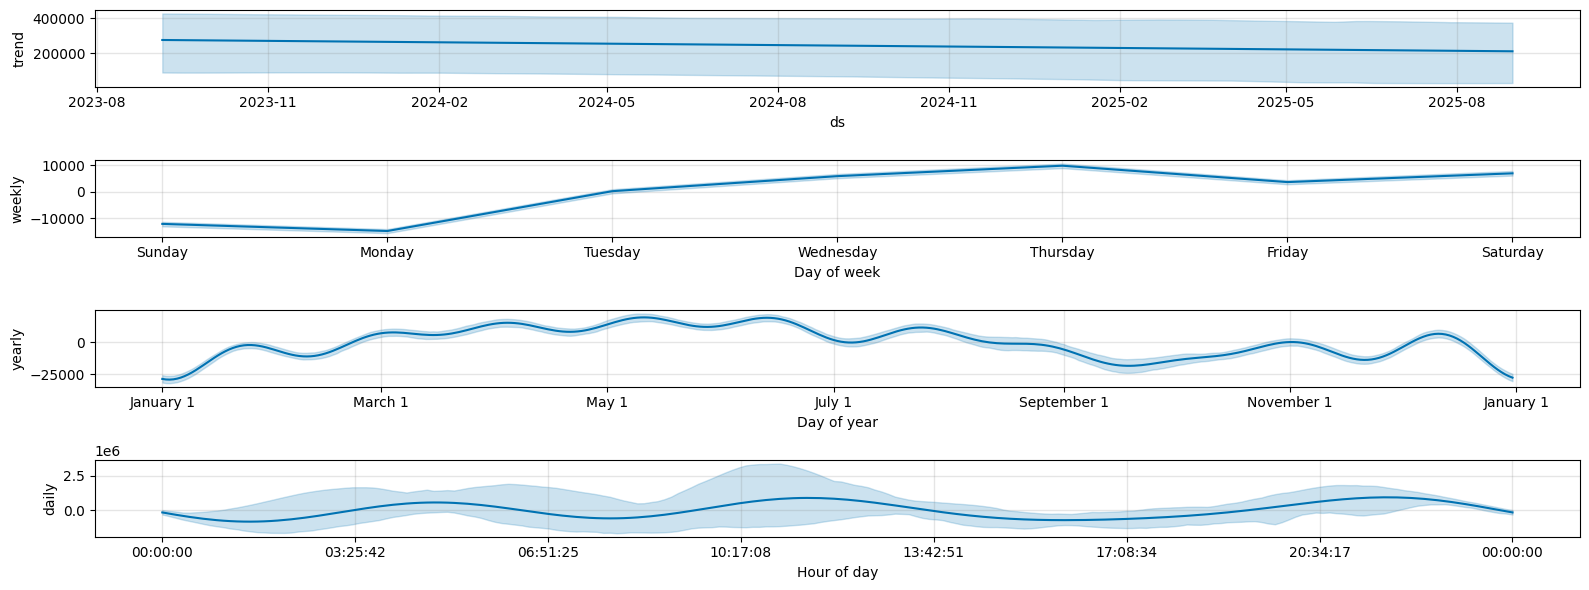

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 4 - con mas samples

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, weekly_seasonality= True, daily_seasonality=True, uncertainty_samples = 150, mcmc_samples=150, interval_width= 0.5)

# Entrenamos el modelo
prophet.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast = prophet.predict(build_forecast)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/r9jc73hl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/y0z7w8_0.json
08:13:28 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91998', 'data', 'file=/tmp/tmp3k5_54x0/r9jc73hl.json', 'init=/tmp/tmp3k5_54x0/y0z7w8_0.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelxhzdf_ac/prophet_model-20241113081328_1.csv', 'method=sample', 'num_samples=75', 'num_warmup=75', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=91998', 'data', 'file=/tmp/tmp3k5_54x0/r9jc73hl.json', 'init=/tmp/tmp3k5_54x0/y0z7w8_0.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelxhzdf_ac/prophet_model-20241113081328_2.csv', 'method=sample', 'num_samples=75', 'num_warmup=75', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

08:14:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91998', 'data', 'file=/tmp/tmp3k5_54x0/r9jc73hl.json', 'init=/tmp/tmp3k5_54x0/y0z7w8_0.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_modelxhzdf_ac/prophet_model-20241113081328_1.csv', 'method=sample', 'num_samples=75', 'num_warmup=75', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_modelxhzdf_ac/prophet_model-20241113081328_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_modelxhzdf_ac/prophet_model-20241113081328_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 75
    num_warmup = 75
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [ ]:
forecast

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2023-09-05  623255.253070   94364.356287  105336.419403  308938.619340   
1   2023-09-06  623164.624389  100631.074863  111077.766137  308799.435753   
2   2023-09-07  623073.995709  101198.583380  112697.901487  308660.252166   
3   2023-09-08  622983.367028   94254.299672  107049.112760  308521.068579   
4   2023-09-09  622892.738348   95466.800675  107998.836241  308381.884992   
..         ...            ...            ...            ...            ...   
722 2025-08-27  557375.242395   26484.236090   74214.745520  228675.060298   
723 2025-08-28  557282.513565   28267.779759   79148.888156  228740.201377   
724 2025-08-29  557189.784735   22695.692949   69699.174733  228809.378195   
725 2025-08-30  557097.055906   23596.857142   73375.140682  228878.555013   
726 2025-08-31  557004.327076    4628.989091   55733.198342  228927.689044   

       trend_upper  additive_terms  additive_terms_lower  \
0    947815.421970  -523021.655189        -849281.923821   
1    947754.241572  -518587.110498        -844744.569474   
2    947693.061174  -515558.666267        -840606.947018   
3    947631.880776  -522613.092732        -847980.477654   
4    947570.700378  -520371.993755        -846035.701520   
..             ...             ...                   ...   
722  880845.104737  -510557.854933        -841164.938774   
723  880819.502596  -506973.012453        -836473.861885   
724  880793.900455  -513581.623915        -843348.630188   
725  880768.298314  -511021.092471        -840977.133867   
726  880742.163184  -531036.199873        -859522.269958   

     additive_terms_upper          daily  ...        weekly  weekly_lower  \
0          -209379.316743 -514018.088378  ...    266.230542   -417.913484   
1          -204971.995183 -514018.088359  ...   5769.321224   5060.470906   
2          -203228.969619 -514018.088365  ...   9867.114547   9210.163561   
3          -206859.015208 -514018.088370  ...   3865.130430   3307.400110   
4          -206123.037874 -514018.088372  ...   7124.262629   6401.616925   
..                    ...            ...  ...           ...           ...   
722        -195363.514124 -514018.088383  ...   5769.321224   5060.470906   
723        -192769.762741 -514018.088365  ...   9867.114547   9210.163561   
724        -195860.367081 -514018.088370  ...   3865.130430   3307.400110   
725        -197185.607815 -514018.088372  ...   7124.262629   6401.616925   
726        -216324.535944 -514018.088377  ... -12104.955610 -12898.652081   

     weekly_upper        yearly  yearly_lower  yearly_upper  \
0      866.056472  -9269.797354 -12650.655950  -6118.984242   
1     6468.614037 -10338.343363 -13750.434544  -7257.542572   
2    10416.297567 -11407.692449 -14786.265348  -8100.385882   
3     4399.179375 -12460.134792 -15837.331401  -8997.175151   
4     7893.188179 -13478.168012 -17076.751102  -9710.532886   
..            ...           ...           ...           ...   
722   6468.614037  -2309.087774  -5784.055094   1119.844848   
723  10416.297567  -2822.038635  -6205.498517    459.896394   
724   4399.179375  -3428.665975  -6804.497442   -232.690356   
725   7893.188179  -4127.266728  -7561.185422   -856.226633   
726 -11291.247827  -4913.155886  -8292.963494  -1624.422174   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
722                   0.0                         0.0   
723                   0.0                         0.0   
724                   0.0                         0.0   
725                   0.0                         0.0   
726                   0.0                    

In [ ]:
forecast.to_csv('forecast_diario_trend_cons.csv')

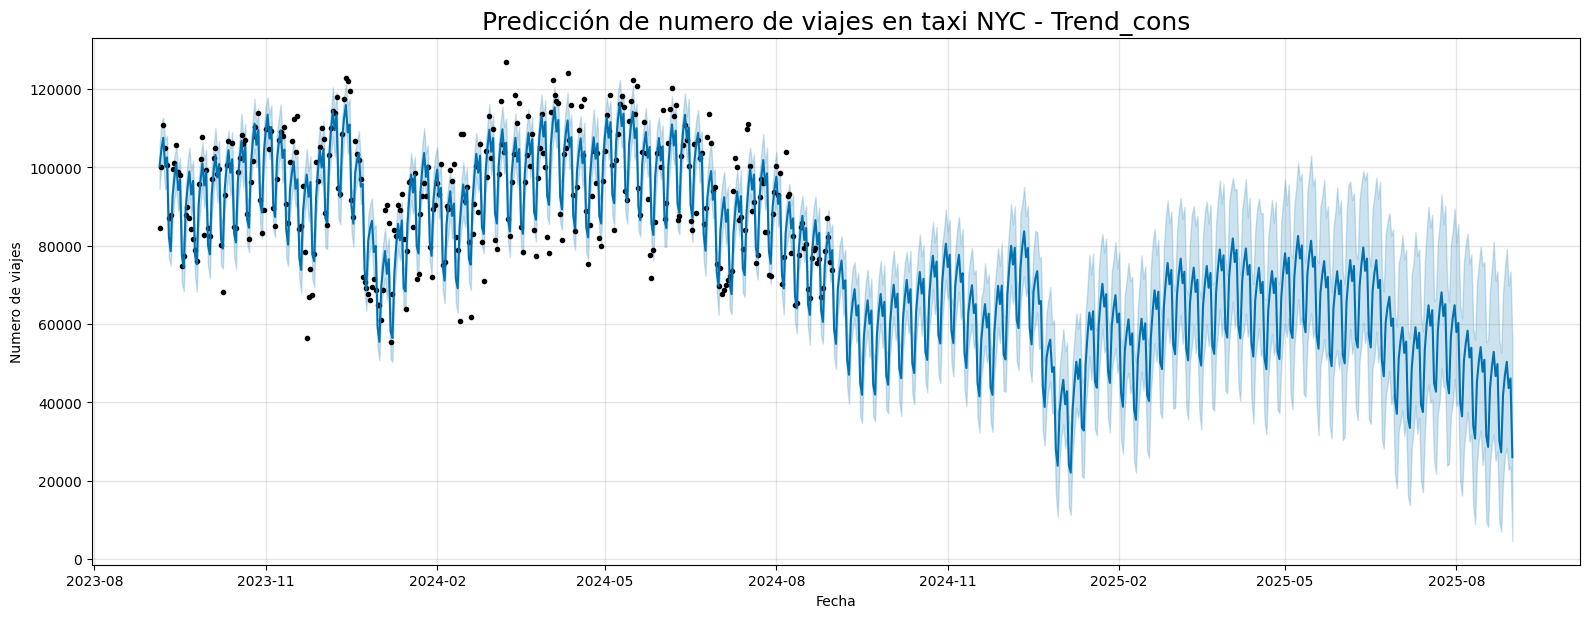

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC - Trend_cons', fontsize = 18)
plt.show()

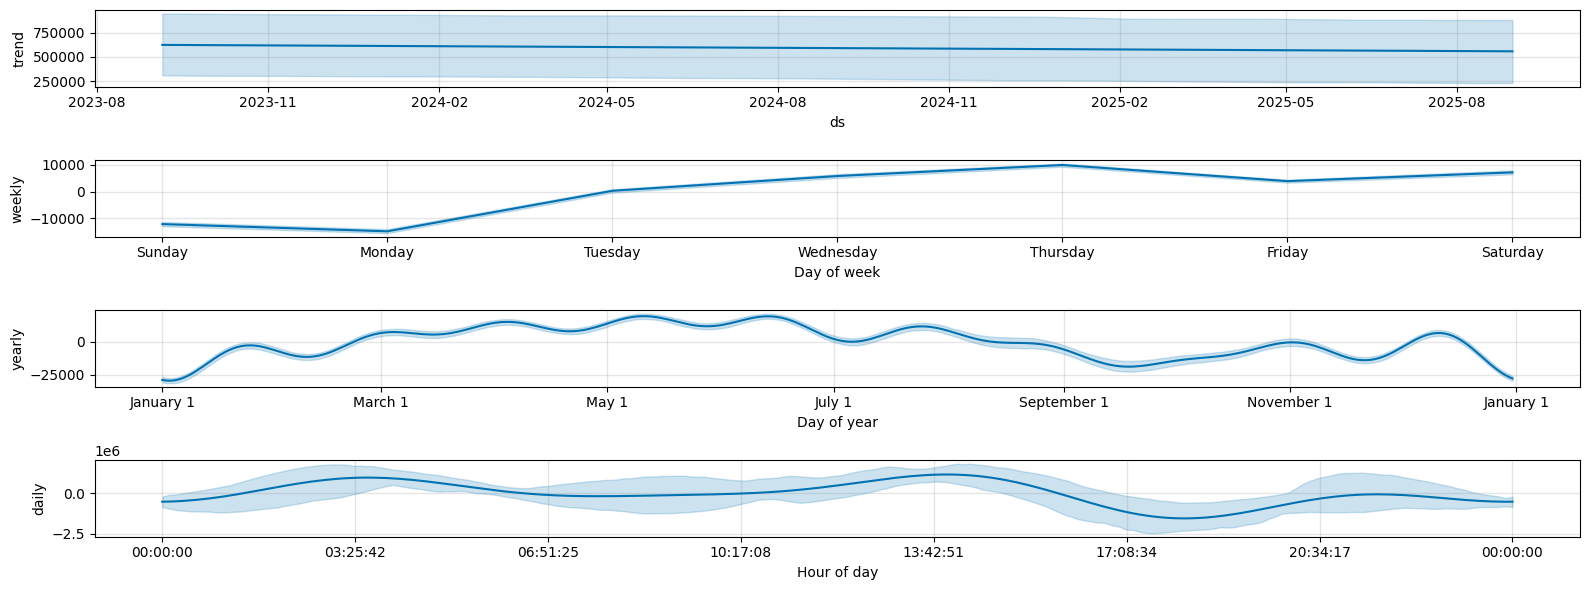

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))

## Modelo 6 - 3 con mas samples

In [ ]:
# Instanciamos un modelo de Prophet

prophet = Prophet(
    daily_seasonality=True,    # Activar estacionalidad diaria
    yearly_seasonality=True,   # Mantener la estacionalidad anual
    uncertainty_samples=200,
    mcmc_samples=200,# Ajustar el número de muestras para un mejor análisis de incertidumbre
    interval_width=0.6         # Intervalo de confianza del 80%
)

# Entrenamos el modelo
prophet.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast = prophet.predict(build_forecast)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/hjl82a04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/hji8u0vh.json
08:15:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71810', 'data', 'file=/tmp/tmp3k5_54x0/hjl82a04.json', 'init=/tmp/tmp3k5_54x0/hji8u0vh.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model20_w8526/prophet_model-20241113081547_1.csv', 'method=sample', 'num_samples=100', 'num_warmup=100', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=71810', 'data', 'file=/tmp/tmp3k5_54x0/hjl82a04.json', 'init=/tmp/tmp3k5_54x0/hji8u0vh.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model20_w8526/prophet_model-20241113081547_2.csv', 'method=sample', 'num_samples=100', 'num_warmup=100', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

08:16:35 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71810', 'data', 'file=/tmp/tmp3k5_54x0/hjl82a04.json', 'init=/tmp/tmp3k5_54x0/hji8u0vh.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model20_w8526/prophet_model-20241113081547_1.csv', 'method=sample', 'num_samples=100', 'num_warmup=100', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_model20_w8526/prophet_model-20241113081547_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_model20_w8526/prophet_model-20241113081547_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 100
    num_warmup = 100
    save_warmup = 0 (Default)
    thin = 1 (Defau

In [ ]:
forecast

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2023-09-05  122099.883155   91103.447956  107662.455837 -150072.231576   
1   2023-09-06  122012.088454   96864.423959  111294.951796 -150134.382456   
2   2023-09-07  121924.293753  100151.334627  114085.671242 -150196.533336   
3   2023-09-08  121836.499052   92924.390350  107353.346769 -150258.684216   
4   2023-09-09  121748.704350   93177.276307  109172.868449 -150320.835096   
..         ...            ...            ...            ...            ...   
722 2025-08-27   59570.891595   20562.171407   80530.470829 -210105.478460   
723 2025-08-28   59485.027578   24027.244804   84432.288833 -210146.492400   
724 2025-08-29   59399.163562   19095.835092   76319.074936 -210186.646481   
725 2025-08-30   59313.299546   21477.145021   79114.562683 -210261.118846   
726 2025-08-31   59227.435529    1933.003867   58497.546623 -210465.450332   

       trend_upper  additive_terms  additive_terms_lower  \
0    381954.615456   -22140.961261        -283492.531677   
1    381861.020401   -17602.121161        -279531.932180   
2    381767.425347   -14645.717334        -275823.225489   
3    381673.830292   -21752.197976        -281903.898883   
4    381580.235238   -19472.384788        -281128.854794   
..             ...             ...                   ...   
722  330474.998239    -9852.075644        -271575.317026   
723  330458.945144    -6343.223974        -268558.387796   
724  330447.411891   -13006.510537        -273951.825603   
725  330402.939730   -10408.520128        -273236.220922   
726  330329.131209   -30308.929309        -291150.975119   

     additive_terms_upper         daily  ...        weekly  weekly_lower  \
0           248577.239719 -12989.794779  ...    293.763731   -618.203857   
1           253129.365401 -12989.794760  ...   5870.410485   5026.777668   
2           255564.182929 -12989.794786  ...   9865.625277   8842.610132   
3           251089.994003 -12989.794811  ...   3781.403307   2825.427578   
4           251461.453731 -12989.794777  ...   7049.570909   6061.848237   
..                    ...           ...  ...           ...           ...   
722         259111.726246 -12989.794804  ...   5870.410485   5026.777668   
723         260495.873035 -12989.794784  ...   9865.625277   8842.610132   
724         254824.632125 -12989.794810  ...   3781.403307   2825.427578   
725         257970.608313 -12989.794776  ...   7049.570909   6061.848237   
726         237025.102619 -12989.794802  ... -12094.111125 -13035.268455   

     weekly_upper        yearly  yearly_lower  yearly_upper  \
0     1228.499744  -9444.930212 -13170.477594  -5635.930357   
1     6663.576371 -10482.736886 -14273.625251  -6618.075556   
2    10885.318807 -11521.547826 -15419.348221  -7501.285252   
3     4696.910515 -12543.806471 -16558.101917  -8369.961741   
4     8029.109690 -13532.160921 -17756.637703  -9290.517462   
..            ...           ...           ...           ...   
722   6663.576371  -2732.691325  -7352.760557   1918.627495   
723  10885.318807  -3219.054467  -7551.129060   1366.579086   
724   4696.910515  -3798.119033  -8209.253107    577.717140   
725   8029.109690  -4468.296261  -8743.515249   -208.987669   
726 -11189.065896  -5225.023383  -9277.611520  -1111.513872   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
722                   0.0                         0.0   
723                   0.0                         0.0   
724                   0.0                         0.0   
725                   0.0                         0.0   
726                   0.0                         0.0   


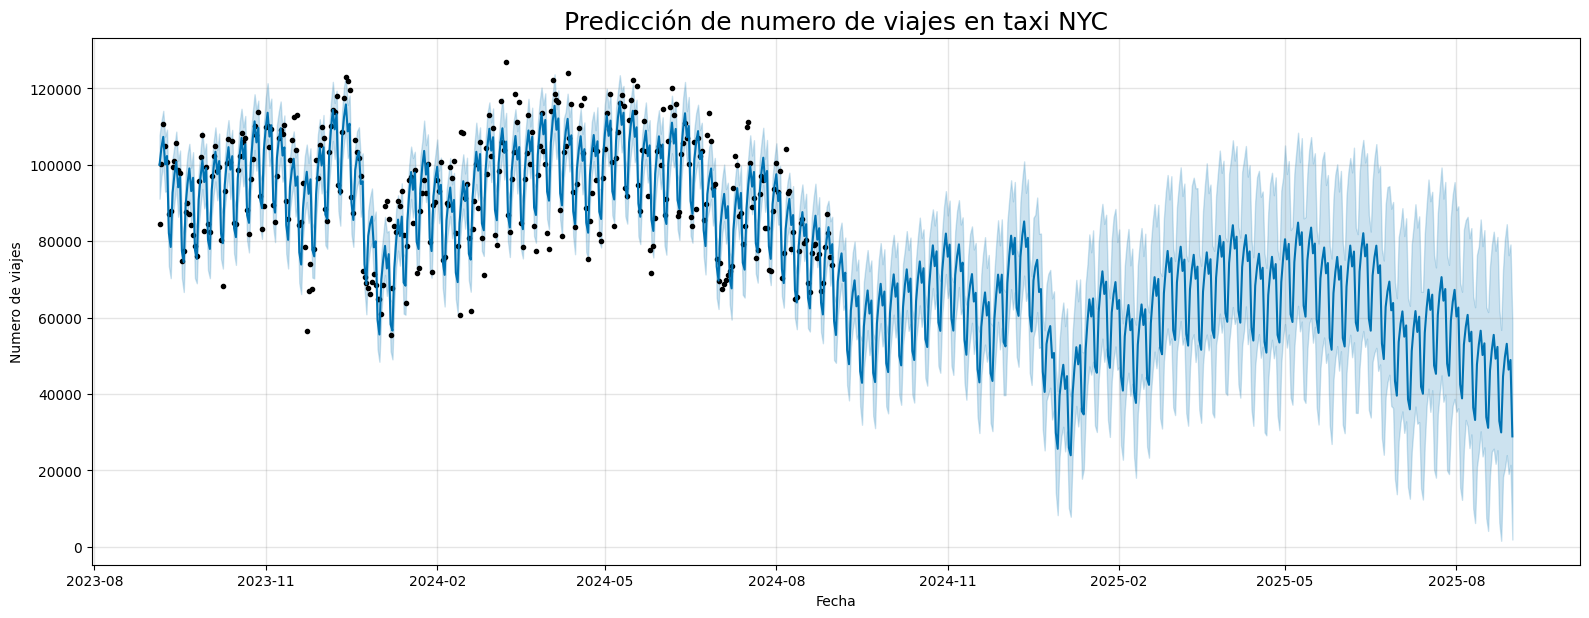

In [ ]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

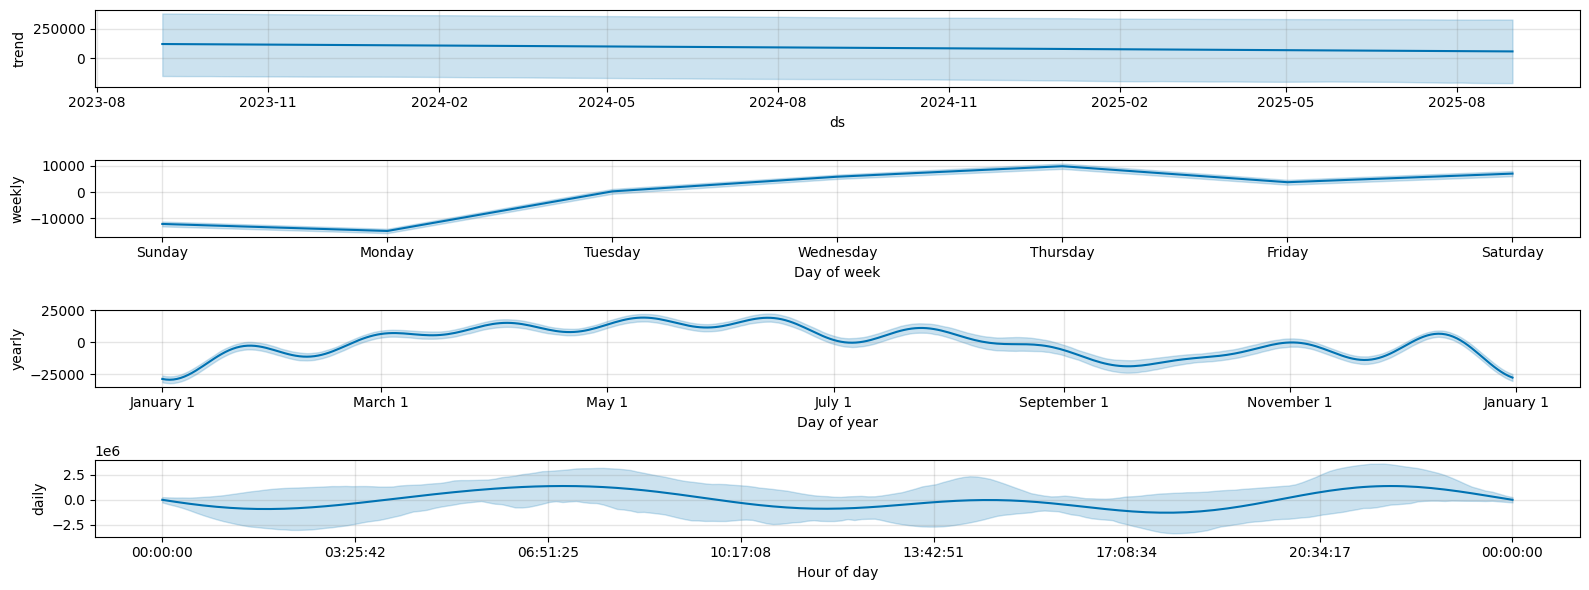

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))